<a href="https://colab.research.google.com/github/gkumbhare/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation.



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

**Objective:**
The objective of this project is to perform customer segmentation using unsupervised machine learning algorithms to identify distinct groups of customers based on their buying behavior.

**Approach:**
To achieve the objective, the following steps were followed:

**In-depth EDA:**
Exploratory data analysis is performed on the customer dataset to understand the data distribution, missing values, and outliers.

**Data preprocessing:**
The dataset is preprocessed by removing irrelevant columns, handling missing values, and scaling the features.

**Implementing Machine Learning Models**

***K-means clustering:*** K-means clustering algorithm was implemented to group the customers into K clusters based on their buying behavior. The optimal value of K is selected using the elbow method and silhouette score. In this project, it is found that the optimal number of clusters was 2.

***Hierarchical clustering:*** Hierarchical clustering algorithm was implemented to group the customers based on their similarity in buying behavior. The dendrogram was used to select the optimal number of clusters. In this project, the optimal number of clusters was found to be 2.

***DBSCAN:*** DBSCAN clustering algorithm was implemented to group the customers based on their density of buying behavior. The optimal values of eps and min_samples were selected using the elbow method.

***Results:*** The results of the project showed that customer segmentation using unsupervised machine learning algorithms can be a powerful tool for businesses to understand their customers' behavior and target them with appropriate marketing strategies. The project identified two distinct groups of customers based on their buying behavior and suggested appropriate marketing strategies to target each group.

***Conclusion:*** In conclusion, the project successfully implemented K-means clustering, hierarchical clustering, and DBSCAN machine learning algorithms to perform customer segmentation. The project's results demonstrate the effectiveness of unsupervised machine learning algorithms in customer segmentation, which can help businesses improve their marketing strategies and increase their sales. Additionally, the project found that there were two clusters that could effectively group the customers based on their buying behavior.

# **GitHub Link -**

https://github.com/gkumbhare/Online-Retail-Customer-Segmentation.git


# **Problem Statement**


**In this project, the task is to identify major customer segments on a transnational dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
# To handle the dataset
import pandas as pd

# For plots and visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Display utilities
from IPython.display import Markdown, display

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')
from numpy import math
from datetime import datetime
from datetime import datetime, time

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset from the google drive
Dataset = pd.read_csv('/content/drive/MyDrive/alma project/unsupervised project/Online Retail.xlsx - Online Retail.csv')

### Dataset First View

In [4]:
# Dataset First Look

Dataset.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(Dataset.shape)

(541909, 8)


### Dataset Information

In [6]:
# Dataset Info

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

print(len(Dataset[Dataset.duplicated()]))   # this code will return the duplicate values of the dataset

5268


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

print(Dataset.isnull().sum()) #this code will return the no. of null or missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<Axes: >

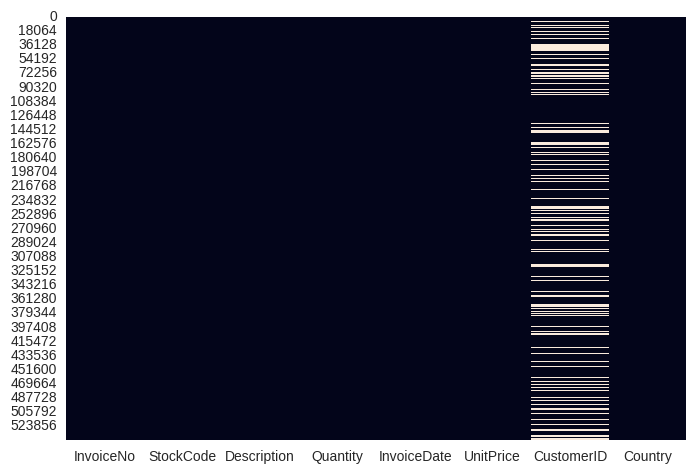

In [9]:
# Visualizing the missing values

sns.heatmap(Dataset.isnull(), cbar=False) #this heat map will show you the data of the null values

### What did you know about your dataset?

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The dataset consists of 541909 rows and 8 columns. However, it is important to note that two of these columns contain missing information. Specifically, the CustomerID column has only 406829 values, indicating that some information is missing. The same is true for the Description column. When looking at the summary statistics generated by the describe function, it is apparent that some negative values exist in the data.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

Dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
# Dataset Describe

Dataset.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Variables Description

##Attribute Information:

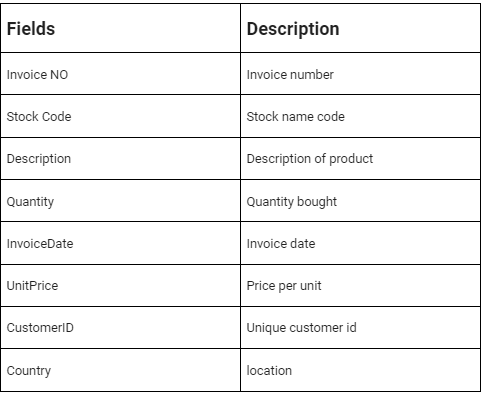

### Check Unique Values for each variable.

In [12]:
# Checking Unique Values for each variable.

for i in Dataset.columns.tolist():
  print("No. of unique values in ",i,"is",Dataset[i].nunique(),".")

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23260 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

#Checking the total number of customer id
Dataset.CustomerID.count()

406829

In [14]:
#Checking number of unique customer id
len(Dataset['CustomerID'].value_counts())

4372

In [15]:
#checking customer with respect to the country
cust_count =pd.DataFrame(Dataset.groupby(['Country'])['CustomerID'].value_counts(ascending=False))
cust_count

CustomerID
Country        CustomerID            
Australia      12415.0            778
               12431.0            186
               12388.0            100
               12393.0             64
               12434.0             54
...                               ...
United Kingdom 18233.0              1
Unspecified    12743.0            134
               16320.0             56
               14265.0             31
               12363.0             23

[4380 rows x 1 columns]

In [16]:
#checking number of unique customer with respect to the country
cust_count =pd.DataFrame(Dataset.groupby(['Country'])['CustomerID'].nunique())
cust_count

CustomerID
Country                         
Australia                      9
Austria                       11
Bahrain                        2
Belgium                       25
Brazil                         1
Canada                         4
Channel Islands                9
Cyprus                         8
Czech Republic                 1
Denmark                        9
EIRE                           3
European Community             1
Finland                       12
France                        87
Germany                       95
Greece                         4
Hong Kong                      0
Iceland                        1
Israel                         4
Italy                         15
Japan                          8
Lebanon                        1
Lithuania                      1
Malta                          2
Netherlands                    9
Norway                        10
Poland                         6
Portugal                      19
RSA                            1
Saudi Arabia                   1
Singapore                      1
Spain                         31
Sweden                         8
Switzerland                   21
USA                            4
United Arab Emirates           2
United Kingdom              3950
Unspecified                    4

In [17]:
#checking top country
country_count=Dataset['Country'].value_counts().reset_index()
country_count.rename(columns={'index': 'Country_Name'}, inplace=True)
country_count.rename(columns={'Country': 'Count'}, inplace=True)
country_count.head()

Country_Name   Count
0  United Kingdom  495478
1         Germany    9495
2          France    8557
3            EIRE    8196
4           Spain    2533

In [18]:
#Converting object type to datetime for InvoiceDate and checking first and last dates
Dataset["InvoiceDate"] = pd.to_datetime(Dataset["InvoiceDate"])
print("Minimum Invoice Date", min(Dataset["InvoiceDate"]))
print("Maximum Invoice Date", max(Dataset["InvoiceDate"]))

Minimum Invoice Date 2010-12-01 08:26:00
Maximum Invoice Date 2011-12-09 12:50:00


In [19]:
#checking deatils of unit price of products

Dataset["UnitPrice"].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [20]:
#lets check any negative price
Dataset[Dataset.UnitPrice<0]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

Here we can see that there are only two rows which have negative unit price because of Adjust bad debt that is described in description.

In [21]:
#removing negative unit price.
Dataset = Dataset[Dataset.UnitPrice >= 0]
Dataset[Dataset.UnitPrice<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [22]:
#checking unit price==0
Dataset[Dataset.UnitPrice==0]

InvoiceNo StockCode                   Description  Quantity  \
622       536414     22139                           NaN        56   
1970      536545     21134                           NaN         1   
1971      536546     22145                           NaN         1   
1972      536547     37509                           NaN         1   
1987      536549    85226A                           NaN         1   
...          ...       ...                           ...       ...   
536981    581234     72817                           NaN        27   
538504    581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
538554    581408     85175                           NaN        20   
538919    581422     23169                       smashed      -235   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00        0.0         NaN  United Kingdom  
1970   2010-12-01 14:32:00        0.0         NaN  United Kingdom  
1971   2010-12-01 14:33:00        0.0         NaN  United Kingdom  
1972   2010-12-01 14:33:00        0.0         NaN  United Kingdom  
1987   2010-12-01 14:34:00        0.0         NaN  United Kingdom  
...                    ...        ...         ...             ...  
536981 2011-12-08 10:33:00        0.0         NaN  United Kingdom  
538504 2011-12-08 13:58:00        0.0         NaN  United Kingdom  
538505 2011-12-08 13:58:00        0.0         NaN  United Kingdom  
538554 2011-12-08 14:06:00        0.0         NaN  United Kingdom  
538919 2011-12-08 15:24:00        0.0         NaN  United Kingdom  

[2515 rows x 8 columns]

In [23]:
#price==0 % of data
print("% of data with Price zero: ", round(len(Dataset[Dataset.UnitPrice == 0]) * 100 / len(Dataset),2),"%" )
#lets check how many id associated with unit price=0
print(" total id associated with unit price=0 : ", Dataset[Dataset.UnitPrice==0].CustomerID.nunique())

% of data with Price zero:  0.46 %
 total id associated with unit price=0 :  31


In [24]:
#Dropping Cases with UnitPrice = 0
Dataset = Dataset[Dataset.UnitPrice >0]
Dataset["UnitPrice"].describe()

count    539392.000000
mean          4.673648
std          94.614722
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [25]:
#Checking the information about Quantity data
Dataset["Quantity"].describe()

count    539392.000000
mean          9.845904
std         215.412652
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [26]:
#checking Quantity less than zero means the number of orders cancelled
Dataset[Dataset.Quantity<=0].value_counts()

InvoiceNo  StockCode  Description                         Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
C543611    82483      WOOD 2 DRAWER CABINET WHITE FINISH  -1        2011-02-10 14:38:00  4.95       17850.0     United Kingdom    4
C538341    22976      CIRCUS PARADE CHILDRENS EGG CUP     -12       2010-12-10 14:03:00  1.25       15514.0     United Kingdom    3
           22730      ALARM CLOCK BAKELIKE IVORY          -1        2010-12-10 14:03:00  3.75       15514.0     United Kingdom    3
           22725      ALARM CLOCK BAKELIKE CHOCOLATE      -1        2010-12-10 14:03:00  3.75       15514.0     United Kingdom    3
C570556    22568      FELTCRAFT CUSHION OWL               -144      2011-10-11 11:10:00  3.39       16029.0     United Kingdom    2
                                                                                                                                 ..
C551388    22902      TOTE BAG I LOVE LONDON              -12       2011-04-28 11

In [27]:
# Number of cancelled and ordered quantity
can_quan=Dataset[Dataset.Quantity<=0]['Quantity'].sum()
ord_quan=Dataset[Dataset.Quantity>0]['Quantity'].sum()
print(f'The cancell quantities are: {can_quan} \nOrdered quantities are: {ord_quan} ')

The cancell quantities are: -277574 
Ordered quantities are: 5588376 


In [28]:
#Here we can see that number of quantities cancelled in each country
can=pd.DataFrame(Dataset[Dataset.Quantity<=0].groupby(['Country'])['Quantity'].sum())
order=pd.DataFrame(Dataset[Dataset.Quantity>0].groupby(['Country'])['Quantity'].sum())
net_c=pd.DataFrame(Dataset.groupby(['Country'])['Quantity'].sum())
co_qu=pd.concat([can,order,net_c], axis=1, keys=['cancelled', 'Ordered','net_ordered quantity'])
co_qu

cancelled  Ordered net_ordered quantity
                      Quantity Quantity             Quantity
Country                                                     
Australia               -556.0    83901                83345
Austria                  -54.0     4881                 4827
Bahrain                  -54.0      314                  260
Belgium                  -85.0    23237                23152
Channel Islands          -12.0     9491                 9479
Cyprus                   -44.0     6361                 6317
Czech Republic           -79.0      671                  592
Denmark                  -47.0     8235                 8188
EIRE                   -4810.0   147173               142363
European Community        -2.0      499                  497
Finland                  -38.0    10704                10666
France                 -1624.0   112103               110479
Germany                -1815.0   119261               117446
Greece                    -1.0     1557                 1556
Hong Kong                 -4.0     4773                 4769
Israel                   -56.0     4409                 4353
Italy                   -113.0     8112                 7999
Japan                   -798.0    26016                25218
Malta                    -26.0      970                  944
Netherlands             -809.0   200361               199552
Norway                   -91.0    19336                19245
Poland                   -31.0     3684                 3653
Portugal                 -78.0    16258                16180
Saudi Arabia              -5.0       80                   75
Singapore                 -7.0     5241                 5234
Spain                  -1127.0    27940                26813
Sweden                  -446.0    36083                35637
Switzerland             -305.0    30629                30324
USA                    -1424.0     2458                 1034
United Kingdom       -263033.0  4662390              4399357
Brazil                     NaN      356                  356
Canada                     NaN     2763                 2763
Iceland                    NaN     2458                 2458
Lebanon                    NaN      386                  386
Lithuania                  NaN      652                  652
RSA                        NaN      351                  351
United Arab Emirates       NaN      982                  982
Unspecified                NaN     3300                 3300

Here, we can see that total number of Quantities ordered ,cancelled, and net ordered quantity in different countries.

In [29]:
#Number of orders cancelled
len(Dataset[Dataset.Quantity<=0])

9288

In [30]:
#Checking top 5 products peoples are buying repeatedly
Description_count=Dataset['Description'].value_counts().reset_index()
Description_count.rename(columns={'index': 'Product_Description'}, inplace=True)
Description_count.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_count.head()
#Description_count

Product_Description  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2365
1            REGENCY CAKESTAND 3 TIER   2198
2             JUMBO BAG RED RETROSPOT   2156
3                       PARTY BUNTING   1726
4             LUNCH BAG RED RETROSPOT   1638

In [31]:
#Lets chekout which are top 5 products peoples are cancelling repeatedly
#counting description
Description_count_can=Dataset[Dataset.Quantity<=0]['Description'].value_counts().reset_index()
Description_count_can.rename(columns={'index': 'Product_Description'}, inplace=True)
Description_count_can.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_count_can.head()
#Description_count


Product_Description  Count
0                    Manual    244
1  REGENCY CAKESTAND 3 TIER    181
2                   POSTAGE    126
3  JAM MAKING SET WITH JARS     87
4                  Discount     77

These are the top 5 product peoples are cancelling repeatedly.

In [32]:
#behavior of each customer.
can_cus=pd.DataFrame(Dataset[Dataset.Quantity<=0].groupby(['CustomerID'])['Quantity'].sum())
order_cus=pd.DataFrame(Dataset[Dataset.Quantity>0].groupby(['CustomerID'])['Quantity'].sum())
net=pd.DataFrame(Dataset.groupby(['CustomerID'])['Quantity'].sum())
pd.concat([can_cus,order_cus,net], axis=1, keys=['cancelled', 'Ordered','net_quantity'])


cancelled  Ordered net_quantity
            Quantity Quantity     Quantity
CustomerID                                
12346.0     -74215.0  74215.0            0
12352.0        -66.0    536.0          470
12359.0        -10.0   1622.0         1612
12362.0        -17.0   2229.0         2212
12365.0         -1.0    174.0          173
...              ...      ...          ...
18278.0          NaN     66.0           66
18280.0          NaN     45.0           45
18281.0          NaN     54.0           54
18283.0          NaN   1397.0         1397
18287.0          NaN   1586.0         1586

[4371 rows x 3 columns]

Here, we get to know the behaviour of each customer, how much they are interested in buying the quantity, and whether they are loyal customer or not.

In [33]:
#lets see the top 5 stock code
top_selling_stock=pd.DataFrame(Dataset.groupby(['StockCode'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ))
top_selling_stock.head(5)

StockCode  Quantity
1112     22197     56450
2916     84077     53847
3401    85099B     47359
3202     84879     36381
440      21212     36039

In [34]:
#converting invoice date column to date time formate
Dataset['InvoiceDate']=pd.to_datetime(Dataset['InvoiceDate'], "format = %Y-%m-%d %H:%M:%S")
# Create a new column named 'Day' in the dataframe
Dataset['Day'] = Dataset['InvoiceDate'].dt.day_name()
# Create a new column named 'Month' in the dataframe
Dataset['Month'] = Dataset['InvoiceDate'].dt.month_name()
# Create a new column named 'Year' in the  dataframe
Dataset['Year'] = Dataset['InvoiceDate'].dt.year
# Create a new column named Time in the data frame
Dataset['Time']=Dataset['InvoiceDate'].dt.time
# Create a new column named Hour in the data frame
Dataset['Hour']=Dataset['InvoiceDate'].dt.hour

In [35]:
month_sale=pd.DataFrame(Dataset.groupby(['Year','Month'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ))
month_sale

Year      Month  Quantity
10  2011   November    741886
11  2011    October    598860
12  2011  September    563391
2   2011     August    409424
6   2011       July    395731
9   2011        May    389870
7   2011       June    381851
8   2011      March    372131
0   2010   December    343197
5   2011    January    307940
1   2011      April    295170
4   2011   February    280684
3   2011   December    230667

Here, we can see that in year 2011, the quantities (sold) are maximum in November followed by October.

In [36]:
#let's see which product has maximum unit price.
pd.DataFrame(Dataset.groupby(['StockCode','Description'])['UnitPrice'].value_counts())

UnitPrice
StockCode    Description                        UnitPrice           
10002        INFLATABLE POLITICAL GLOBE         0.85              50
                                                1.66              14
                                                1.63               7
10080        GROOVY CACTUS INFLATABLE           0.39              21
                                                0.85               1
...                                                              ...
gift_0001_40 Dotcomgiftshop Gift Voucher £40.00 33.33              2
                                                34.04              1
gift_0001_50 Dotcomgiftshop Gift Voucher £50.00 41.67              3
                                                42.55              1
m            Manual                             2.55               1

[16282 rows x 1 columns]

Here, we can see that the same product are available at different per unit prices.In this we can easily see that different per unit price of same product.

In [37]:
#Here we will see that top 5 costly product
max_p=Dataset.sort_values(by=['UnitPrice'], ascending=False)
max_p[['Description','UnitPrice']].head(5)

Description  UnitPrice
222681      Manual   38970.00
524602  AMAZON FEE   17836.46
43702   AMAZON FEE   16888.02
43703   AMAZON FEE   16453.71
15016   AMAZON FEE   13541.33

Here, we can see that the Manual and Amazon Fee are the top costlier products.

In [38]:
#Here, we will see the top 5 least costlier product
min_p=Dataset.sort_values(by=['UnitPrice'], ascending=True)
min_p[['Description','UnitPrice']].head(5)

Description  UnitPrice
157195  PADS TO MATCH ALL CUSHIONS      0.001
279045  PADS TO MATCH ALL CUSHIONS      0.001
361741                Bank Charges      0.001
359871  PADS TO MATCH ALL CUSHIONS      0.001
108088                    Discount      0.010

Here, we can see that the Pads to Match all Cushions are the cheapest

In [39]:
# Determine the time period
df_vis=Dataset.copy()

df_vis['parts of day'] = Dataset['Time'].apply(lambda t: "Morning(6-12)" if time(6, 0) <= t <= time(11, 59) else \
                        ("Afternoon(12-18)" if time(12, 0) <= t <= time(17, 59) else \
                        ("Evening(18-22)" if time(18, 0) <= t <= time(21, 59) else "Night(22-6)")))

part_day=pd.DataFrame(df_vis.groupby(['parts of day'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ))
part_day

parts of day  Quantity
0  Afternoon(12-18)   3222130
2     Morning(6-12)   1983666
1    Evening(18-22)    105006

Here, we can see that net quantity ordered is maximum at Afternoon time following Morning then Evening, and no net quantity is ordered at Night.

### What all manipulations have you done and insights you found?

Here, by doing data wrangling we found that:

1.   There are only 4372 unique customer id.

1.   We found that number of unique customer are maximum in United Kingdom (i.e. around 3970).

1.  There are only two rows which have negative unit price because of Adjustment of bad debt that is described in description.

1.   The cancelled number of quantities are: -277574, and the Ordered quantities are: 5588376 .
2.   We found that the number of Quantities ordered, cancelled, and net ordered quantity in different countries.

2.  Top 5 products peoples are buying repeatedly:

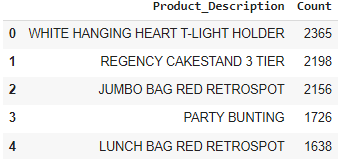

1.  7. Top 5 products peoples are cancellinig repeatedly.

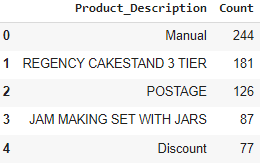

1.   We found out that the number of Quantities ordered, cancelled, and net ordered quantities by different customers by which we get to know the behaviour of each customer, how much they are interested in buying the quantity, and whether they are loyal customer or not.

1.   Here, we found out that in 2010, the quantity ordered in the month of December only, and in year 2011 the quantity ordered almost in every month.
2.   Here, we found that same product are available at different per unit prices.

2.  The 'Manual'(38970.00 per unit) and 'Amazon Fee' (17836.00 per unit) are the top costlier product.
2.  The 'Pads to Match all Cushions'(0.001 per unit) are the cheapest quantity.

1.  We found that the net quantity ordered is maximum in the Afternoon time following Morning then Evening and no net quantity is ordered in Night.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar plot of top five customer who has ordered maximum quantity.


In [40]:
top_customers = pd.DataFrame(Dataset['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
top_customers.rename(columns = {'index':'CustomerID','CustomerID':'count'},inplace = True)


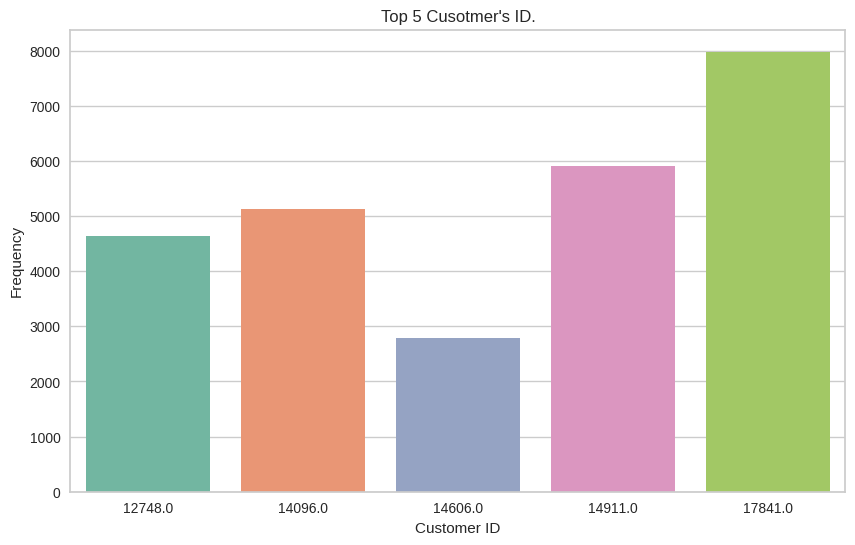

In [41]:
# Chart - 1 visualization code

# Plotting top five customers
plt.figure(figsize = (10,6))
sns.barplot(x = 'CustomerID',y = 'count',palette= 'Set2',data = top_customers[:5])
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title("Top 5 Cusotmer's ID.")
plt.show('jpg')

##### 1. Why did you pick the specific chart?

To compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

Here, we have the top 5 customer id who is ordering maximum quantities. The customer ID 17841 has ordered maximum number of quantities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are very helpful in positive business growth because the retailer will get to know which cusstomer are ordering heighest number of the quantities.

#### Chart - 2-Bar plot of top 5 product customers are ordering repeatedly.

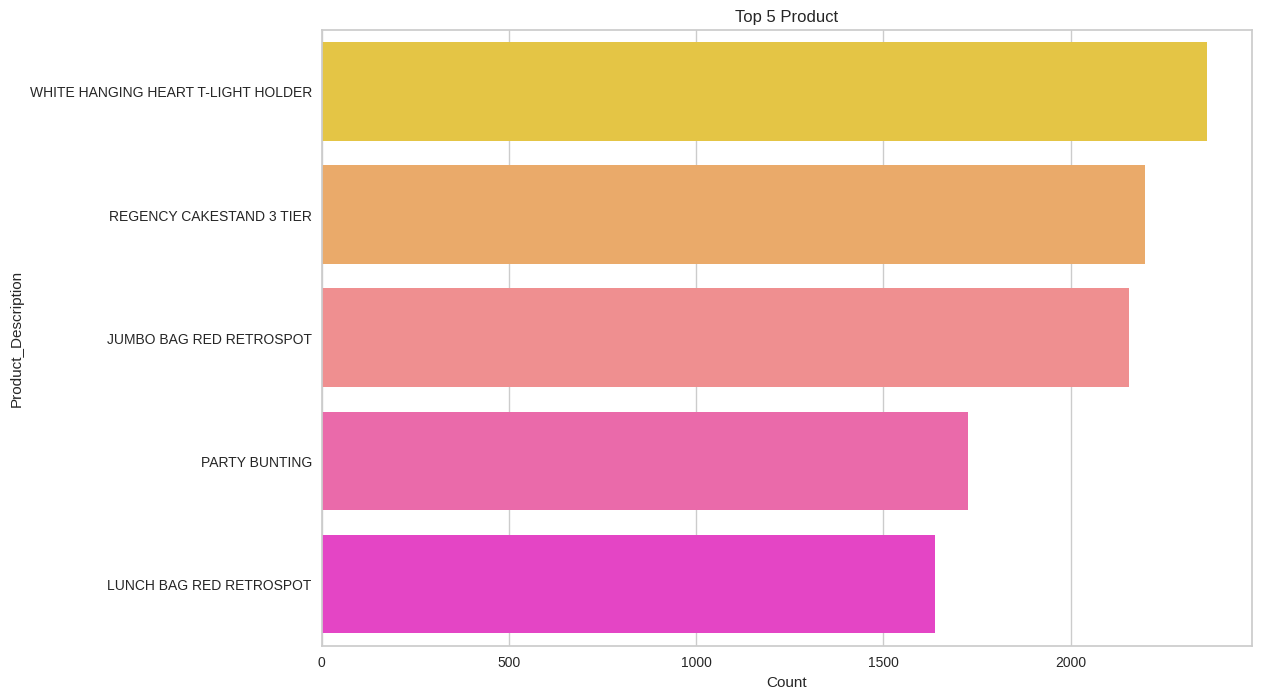

In [42]:
# Chart - 2 visualization code

plt.figure(figsize=(12,8))
plt.title('Top 5 Product')
sns.barplot(x='Count',y='Product_Description',data=Description_count[:5], palette='spring_r');
plt.show('jpg')


##### 1. Why did you pick the specific chart?

Here, we used bar plot because bar plots helps to compare the values of one or more numerical variables across different categories.



##### 2. What is/are the insight(s) found from the chart?

Here, we can see that top 5 products the customers are ordering repeatedly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are very helpful in creating positive business growth because it helps the retailer to manage the stock of the product which are high in demand.

#### Chart - 3 - Bar plot of top 5 product people are cancelling repeatedly.

In [43]:
# Chart - 3 visualization code

plt.figure(figsize=(12,8))
plt.title('Top 5 Product customers are cancelling repeatedly')
sns.barplot(x='Count',y='Product_Description',data=Description_count_can[:5], palette='spring_r');
plt.show('jpg')

##### 1. Why did you pick the specific chart?

Here, we have used bar plot because bar plot helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

Here, we can see that top 5 products that the customers are cancelling repeatedly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights lead to positive business growth because the retailer will know which products the customers are canceling repeatedly, and which are least in demand, and on the basis of that he can manage the particular products on the website.

#### Chart - 4 - Percentage of Order from each Country

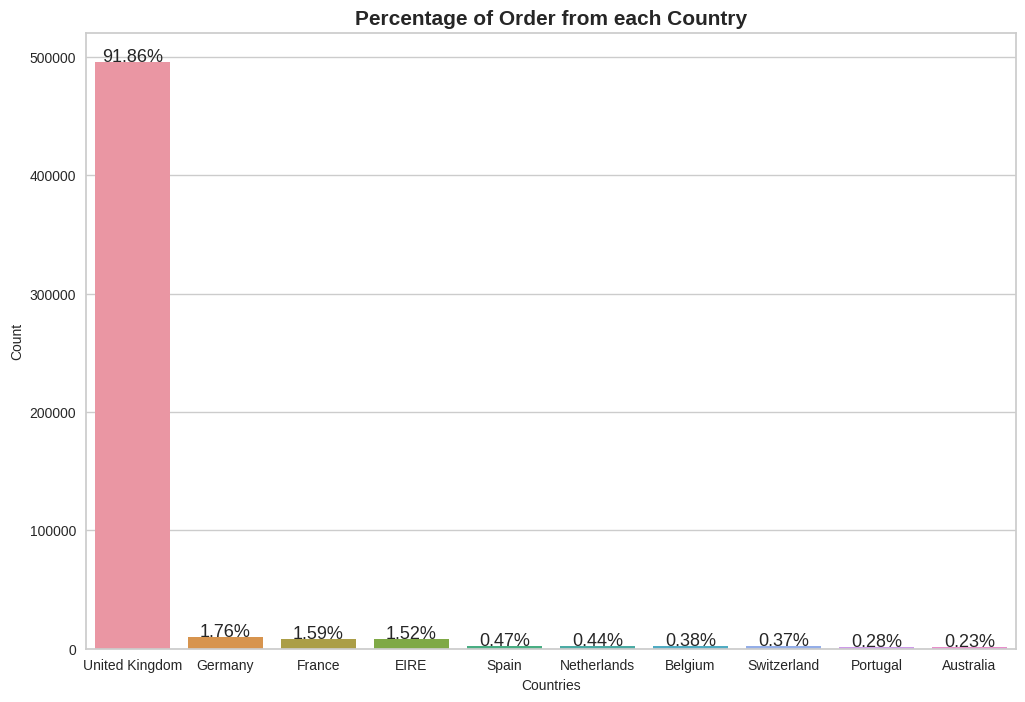

In [44]:
# Chart - 6 visualization code

fig, ax = plt.subplots(figsize = (12,8))
splot = sns.barplot(x='Country_Name',y='Count',data = country_count[:10])
plt.title('Percentage of Order from each Country', size = 15, fontweight ='bold')
plt.xlabel('Countries', size = 10)
plt.ylabel('Count', size = 10)
for p in splot.patches:
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/Dataset.shape[0]*100),ha = "center", size = 13)
plt.show('jpg')


##### 1. Why did you pick the specific chart?

To find out the countries purchasing power.

##### 2. What is/are the insight(s) found from the chart?

As per the gained insight, United Kingdom has the highest purchasing power followed by Germany in the given stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As per the above insights, we can work on increasing the number of stores in countries where selling is comparatively less. And it will help us to create the positive business impact.

#### Chart - 5 - top 5 stock

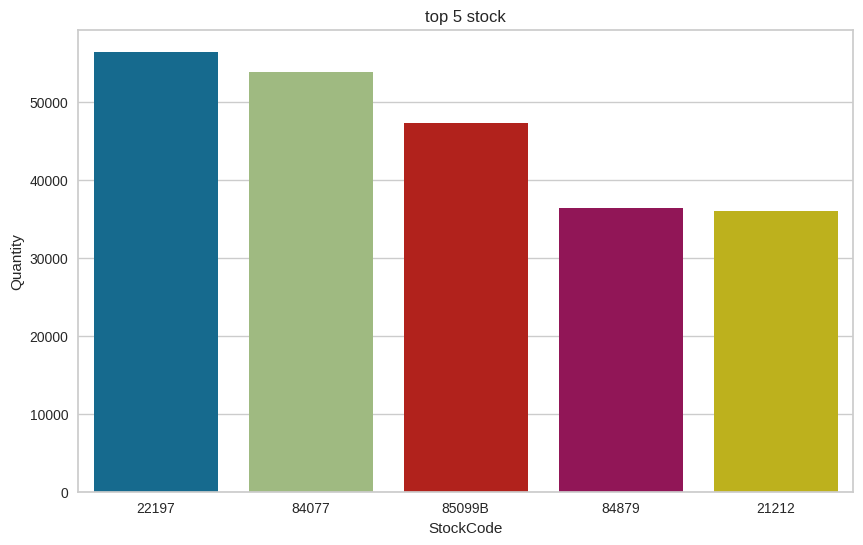

In [45]:
# Chart - 7 visualization code

plt.figure(figsize=(10,6))
plt.title('top 5 stock')
sns.barplot(x='StockCode',y='Quantity',data=top_selling_stock.head(5))
plt.show('jpg')

##### 1. Why did you pick the specific chart?

Here, we have used bar plot because bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

Here, we can see that top 5 stock code which are in high demand.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insights are very helpful in maintaing the stock of the retailer so it leads to posititve business growth.

#### Chart - 6 - Monthy ordered quantity in the year 2010 and 2011

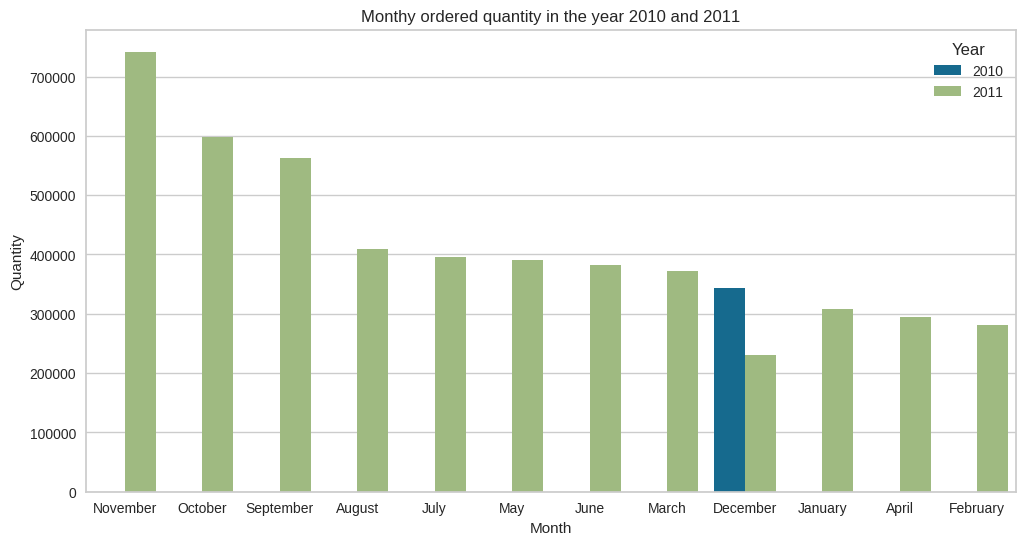

In [46]:
# Chart - 8 visualization code

plt.figure(figsize=(12,6))
plt.title('Monthy ordered quantity in the year 2010 and 2011')
ax=sns.barplot(x=month_sale['Month'], y=month_sale['Quantity'],hue=month_sale['Year'])
plt.show('jpg')

##### 1. Why did you pick the specific chart?

Here, we have used sub bar plots because bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

By seeing the above plot, we can see that in the year 2010, the quantities are ordered only in the month of december while in 2011, the quantities are ordered in almost every month of the year. In 2011, the maximum quantities are ordered in the month of November, and minimum quantities are ordered in the month of December.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights leads to positive business growth because it helps the retailer get know the busiest month, and he can manage the future stock of the products so that he can't run out of stock.

#### Chart - 7 - Busiest Months

In [47]:
# Chart - 9 visualization code
busiest_months=Dataset.groupby('Month')['InvoiceNo'].count().sort_values(ascending=False).reset_index().rename(columns={'InvoiceNo': 'Distinct_No_of_Customers'})
plt.figure(figsize=(12,7))
sns.barplot(x=busiest_months['Month'],y=busiest_months['Distinct_No_of_Customers'])
plt.title('Busiest Months')
plt.show('jpg')

##### 1. Why did you pick the specific chart?

Here, we have used bar plot to commpare the total number of distinct invoice number generated in each month so that we can easily find out the busiest month.



##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clear that the busiest month is November, and least busiest month is February.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will lead us in creating positive business impact.

#### Chart - 8 - Sales on Each Day of Week

In [48]:
# Chart - 10 visualization code

# Find the busiest day of the week using the groupby operation using the day and Invoice number
busiest_date=Dataset.groupby('Day')['InvoiceNo'].count().sort_values(ascending=False).reset_index()
# visualization code
plt.figure(figsize=(10,6))
sns.barplot(x=busiest_date['Day'], y=busiest_date['InvoiceNo'])
plt.title('Sales on Each Day of Week')
plt.ylabel('Number of Customers')
plt.show('jpg')

##### 1. Why did you pick the specific chart?

Here, we have used bar plot because bar plots help to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

The stores are getting high traffic on Thursday followed by Tuesday, and least traffic on sunday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will definitely help to create positive impact.

#### Chart - 9 - busiest_hours

In [49]:
# Chart - 11 visualization code

busiest_hours = Dataset.groupby('Hour')['Quantity'].count().reset_index()
plt.figure(figsize=(8,6))
plt.title('Busiest_hours')
sns.barplot(x=busiest_hours['Hour'],y=busiest_hours['Quantity'])
plt.show('jpg')

##### 1. Why did you pick the specific chart?

Here, we have used bar plot to compare sales of each hour of the day.



##### 2. What is/are the insight(s) found from the chart?

The busiest hours ranges from 10:00 AM to 4:00 PM.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight help us to identify the busiest hours, and we can arrange for the man power and products accordingly.



#### Chart - 10 - Top 10 Frequent Customers

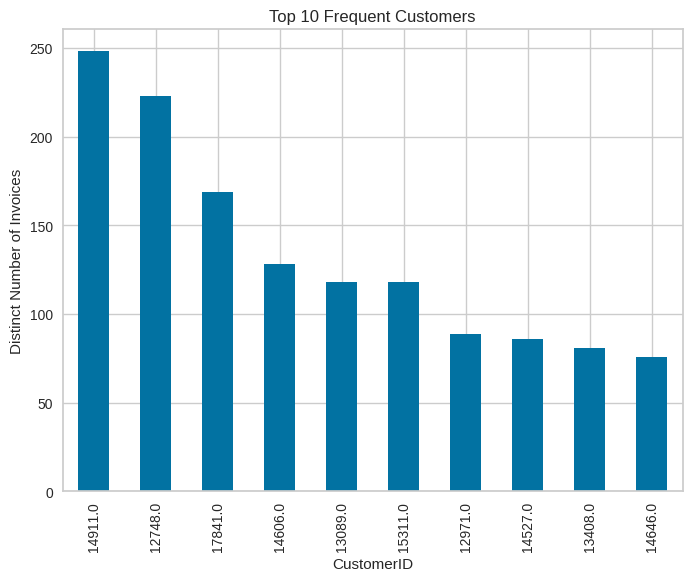

In [50]:
# Chart - 12 visualization code

frequent_customers=Dataset.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
plt.figure(figsize=(8,6))
frequent_customers.head(10).plot(kind='bar')
plt.title('Top 10 Frequent Customers')
plt.ylabel('Distinct Number of Invoices')
plt.show('jpg')

##### 1. Why did you pick the specific chart?

To find the most frequent customers.

##### 2. What is/are the insight(s) found from the chart?

We found out that the most frequent customer is 17841 followed by 14911.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight from the above bar plot will help us recognize the valued customers. And this will help us create a positive business impact.

#### Chart - 11 - Monthly orderd and cancelled quantity of Year 2011

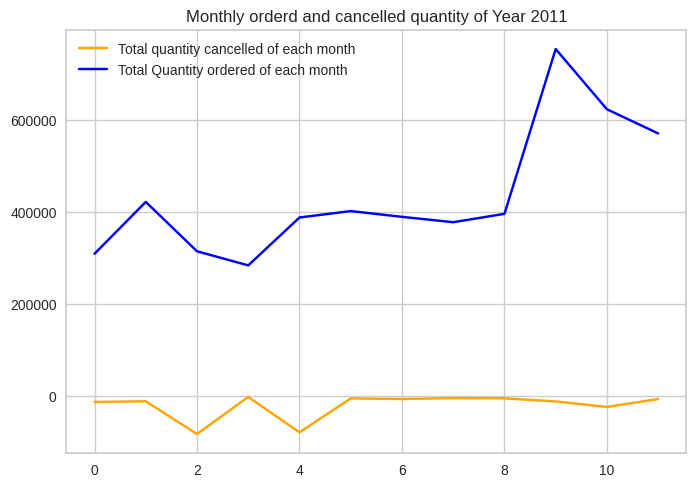

In [51]:
# Chart - 13 visualization code
#Line plot to show variaton of ordered and cancelled quantity aacross each month of year 2011.
c=pd.DataFrame(df_vis[df_vis.Quantity<=0])
ord=pd.DataFrame(df_vis[df_vis.Quantity>0])
cancelled_quantity_monthly= c[c['Year']== 2011].groupby('Month')['Quantity'].sum().reset_index()
ordered_quantity_monthly = ord[ord['Year']== 2011].groupby('Month')['Quantity'].sum().reset_index()
plt.plot(cancelled_quantity_monthly.loc[:,'Quantity'],label='Total quantity cancelled of each month',color='orange')
plt.plot(ordered_quantity_monthly.loc[:,'Quantity'],label='Total Quantity ordered of each month',color='blue')
plt.title('Monthly orderd and cancelled quantity of Year 2011')
plt.legend()

##### 1. Why did you pick the specific chart?

Here, we have used Line plot to show variation of ordered quantities and canelled quantities across each month of the year 2011.



##### 2. What is/are the insight(s) found from the chart?

In the cancelled quantity (Yellow Line):
1.   Cancelled quantities are minimum in February and April
2.   Cancelled quantities are approximately same apart from these two months (i.e. February and April)

In the ordered quantity(Blue Line):
1.   At the starting of October month, the ordered quantities are maximum.
1.   From May to August, the ordered quantity is almost same.
2.   In February and March, ordered quantities are least.
2.  After October, the ordered quantities are decreasing.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights leads to positive business growth because it helps the retailer to analyze the ordered and cancelled quantities, and on the basis of that he can manage the stock.

#### Chart - 12 - Correlation Heatmap

<Axes: >

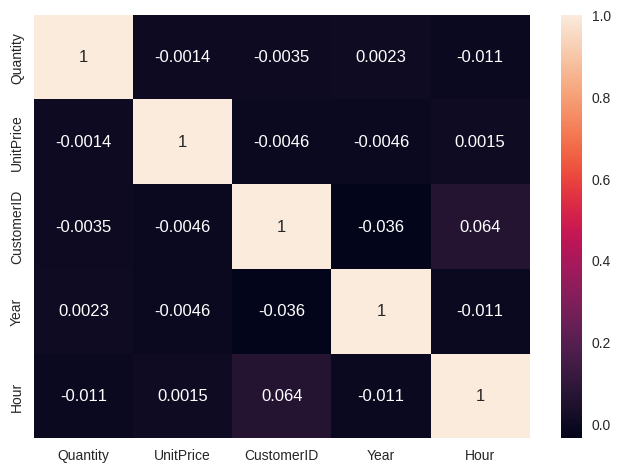

In [52]:
# Correlation Heatmap visualization code

sns.heatmap(Dataset.corr(),annot=True)

##### 1. Why did you pick the specific chart?

To find the correlation between the numerical features.

##### 2. What is/are the insight(s) found from the chart?


Hence, we know that 1 denotes the high positive correlation, and -1 shows high negative correlation.

From the above heatmap, we can say that the features are independent to each other.

#### Chart - 13 - Pair Plot

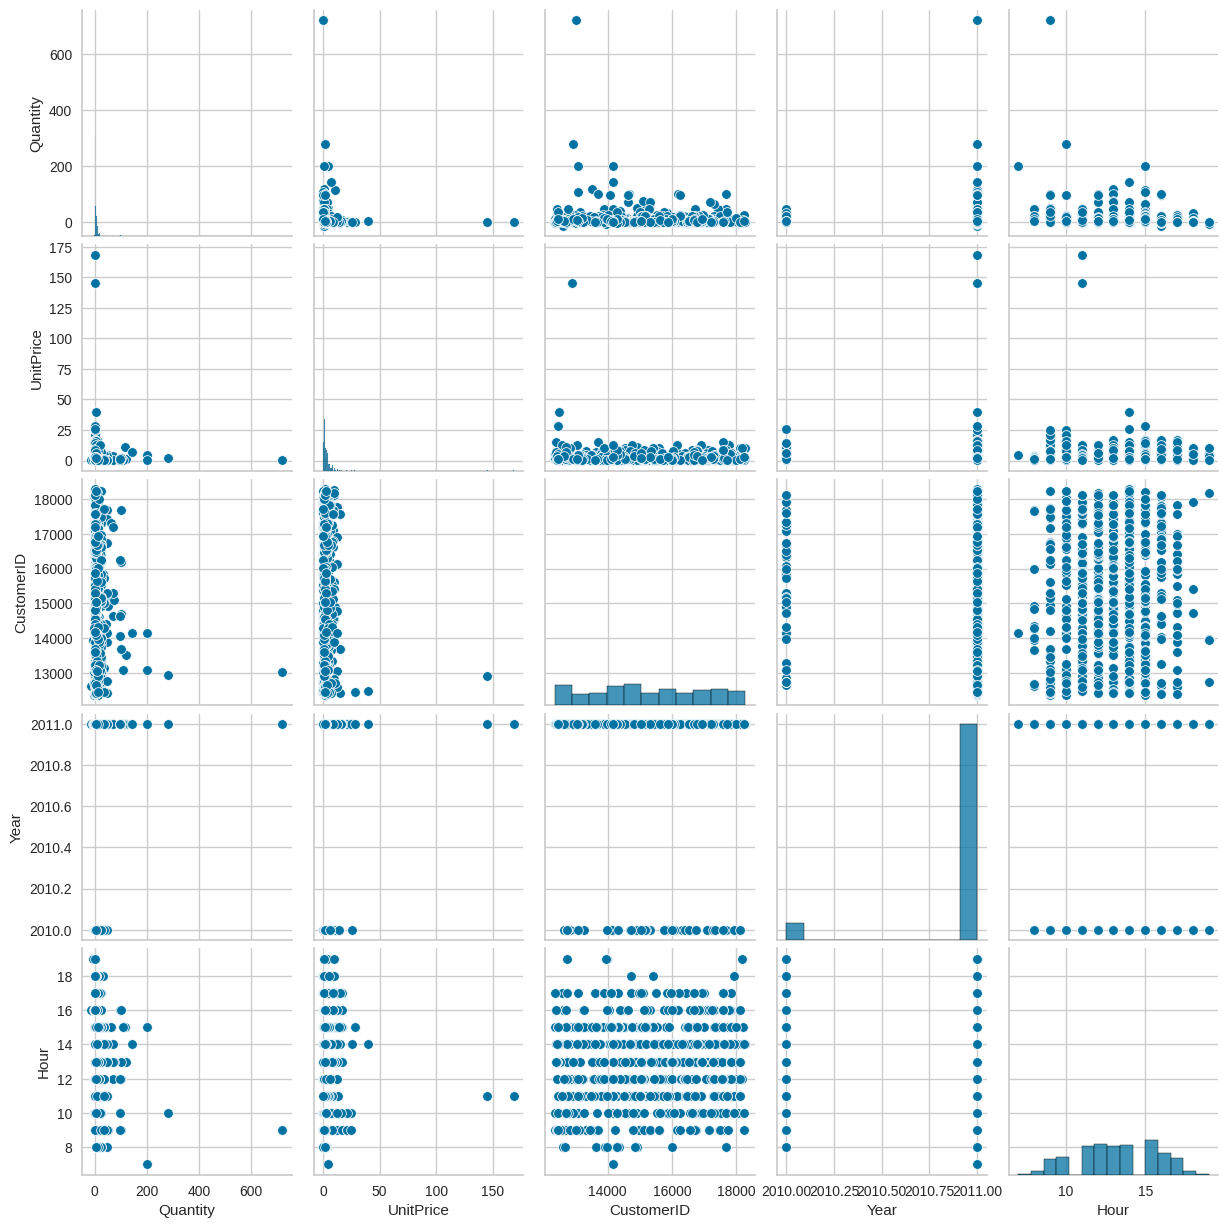

In [53]:
# Pair Plot visualization code

# Select a representative sample of the data
sample_size = 1000
df_sample = Dataset.sample(n=sample_size)

# Create the pairplot
sns.pairplot(df_sample)

plt.show('jpg')

##### 1. Why did you pick the specific chart?

To find the positive or negative correlation between the features using the scatterplots.



##### 2. What is/are the insight(s) found from the chart?

The above pairplot shows that the features are independent to each other because there is no correlation between the features.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Customers from the United Kingdom spend more on average per order than customers from other countries.

**H_0** = There is no difference in mean unit price per order between the UK and other countries.

**H_a** = There is difference in mean unit price per order between the UK and other countries.

In [54]:
uk_customers = Dataset[Dataset['Country'] == 'United Kingdom']['UnitPrice']  # dataframe containing only uk customers
non_uk_customers = Dataset[Dataset['Country'] != 'United Kingdom']['UnitPrice'] # dataframe containing only non-uk customers

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind
# Perform two-sample t-test
t_stat, p_value = ttest_ind(uk_customers, non_uk_customers)

# Print results
print('stat=%.3f, p=%.3f' % (t_stat, p_value))
if p_value >= 0.05:
      print("We fail to reject the null hypothesis. So, there is no difference in mean unit price per order between the UK and other countries.")
else:
      print("We reject the null hypothesis and conclude that UK customers spend more on average per order than customers from other countries.")


stat=-1.856, p=0.063
We fail to reject the null hypothesis. So, there is no difference in mean unit price per order between the UK and other countries.


##### Which statistical test have you done to obtain P-Value?

we have used t_test.

A t-test is a statistical test that is used to compare the means of two groups of data to determine whether there is a significant difference between them. It is a hypothesis test that helps in determining whether the difference between the means of the two groups is due to chance or is statistically significant

##### Why did you choose the specific statistical test?

We choose to use a t-test when we want to compare the means of two groups and determine whether the difference between them is statistically significant. The t-test is a commonly used statistical test because it is simple to calculate and interpret, and it can provide reliable results when certain assumptions are met.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average unit price of items in orders placed before noon is lower than the average unit price of items in orders placed after noon.

**H_0** = There is no difference in mean unit price between orders placed before and after noon.

**H_a**= There is difference in mean unit price between orders placed before and after noon.

#### 2. Perform an appropriate statistical test.

In [56]:
# Convert InvoiceDate to datetime format
Dataset['InvoiceDate'] = pd.to_datetime(Dataset['InvoiceDate'])

# Filter for orders placed before noon and after noon
before_noon = Dataset[Dataset['InvoiceDate'].dt.hour < 12]['UnitPrice']
after_noon = Dataset[Dataset['InvoiceDate'].dt.hour >= 12]['UnitPrice']

In [57]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind
# Perform two-sample t-test
t_stat, p_value = ttest_ind(before_noon, after_noon)

# Print results
print('stat=%.3f, p=%.3f' % (t_stat, p_value))
if p_value >= 0.05:
    print("We fail to reject the null hypothesis. So, there is no difference in mean unit price between orders placed before and after noon.")
else:
    print("We reject the null hypothesis and conclude that there is difference in mean unit price between orders placed before and after noon.")


stat=0.067, p=0.946
We fail to reject the null hypothesis. So, there is no difference in mean unit price between orders placed before and after noon.


# Which statistical test have you done to obtain P-Value?

We have used t_test.

The t-test is a statistical method used to evaluate whether the mean values of two data sets differ significantly. By conducting a hypothesis test, it helps to determine whether the observed difference between the two means is likely to have occurred by chance or if it is statistically significant.

##### Why did you choose the specific statistical test?

The t-test is a statistical tool that is commonly utilized when we want to compare the means of two groups and evaluate whether the difference between them is statistically significant. This test is popular among researchers because it is easy to calculate and interpret, and it can produce dependable outcomes when specific assumptions are satisfied.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [58]:
# Handling Missing Values & Missing Value Imputation

print(np.sum(Dataset.isnull()), "\n")
print("Percentage of customers id missing: ", round(Dataset['CustomerID'].isnull().sum() * 100 / len(Dataset),2),"%" )

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132603
Country             0
Day                 0
Month               0
Year                0
Time                0
Hour                0
dtype: int64 

Percentage of customers id missing:  24.58 %


In [59]:
# Create a variable 'cancelled_orders' to store all the rows in 'retail_df' where the value in the 'InvoiceNo' column contains the character 'C'
cancelled_orders = Dataset[Dataset['InvoiceNo'].astype(str).str.contains('C')]

# Display the first 5 rows of 'cancelled_orders' dataframe
cancelled_orders.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country        Day  \
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  Wednesday   
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  Wednesday   
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  Wednesday   
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  Wednesday   
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  Wednesday   

        Month  Year      Time  Hour  
141  December  2010  09:41:00     9  
154  December  2010  09:49:00     9  
235  December  2010  10:24:00    10  
236  December  2010  10:24:00    10  
237  December  2010  10:24:00    10

it looks like negative quantity related to the cancel order

In [60]:
#finding total cancelled order
print("Percentage of cancel order: ", round(len(cancelled_orders) * 100 / Dataset['InvoiceNo'].nunique(),2),"%" )

Percentage of cancel order:  39.03 %


In [61]:
df2=Dataset.copy()

In [62]:
# Filter the copied dataframe to only include rows where the 'Quantity' column is greater than 0
df2 = df2[df2['Quantity'] > 0]

# Check the shape of the filtered dataframe
print("Number of rows:", df2.shape[0], "Number of columns:", df2.shape[1])

Number of rows: 530104 Number of columns: 13


In [63]:
#checking whether we are right
cancelled_orders = df2[df2['InvoiceNo'].astype(str).str.contains('C')]

# Display the first 5 rows of 'cancelled_orders' dataframe
cancelled_orders.head()

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Day, Month, Year, Time, Hour]
Index: []

In [64]:
#dropping null values
df2.dropna(inplace=True)
print(df2.shape)

(397884, 13)


In [65]:

print(np.sum(df2.isnull()), "\n")

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Day            0
Month          0
Year           0
Time           0
Hour           0
dtype: int64 



#### What all missing value imputation techniques have you used and why did you use those techniques?

There was a huge number of missing values in the dataset so, we removed them.

### 2. Handling Outliers

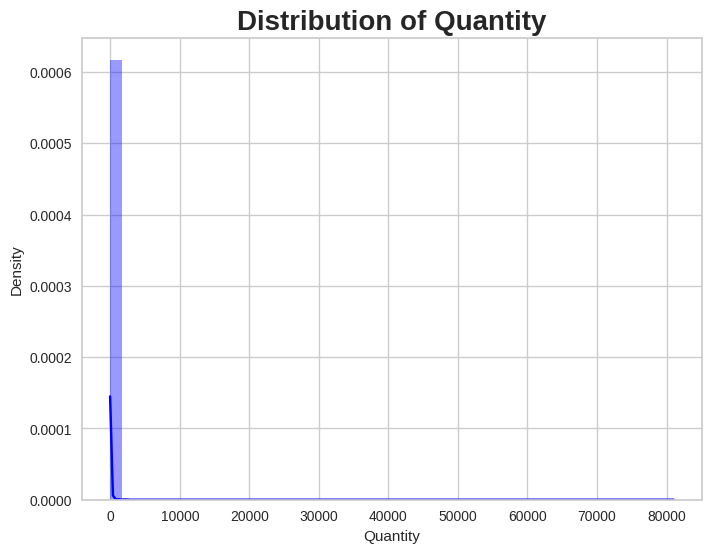

In [66]:
#Distribution of Quantity
# Set the figure size for the plot
plt.figure(figsize=(8,6))
# Set the plot title
plt.title('Distribution of Quantity', size=20, fontweight='bold')

# Plot the distribution of Quantity data
sns.distplot(df2['Quantity'], color='blue')

# Display the plot
plt.show('jpg')

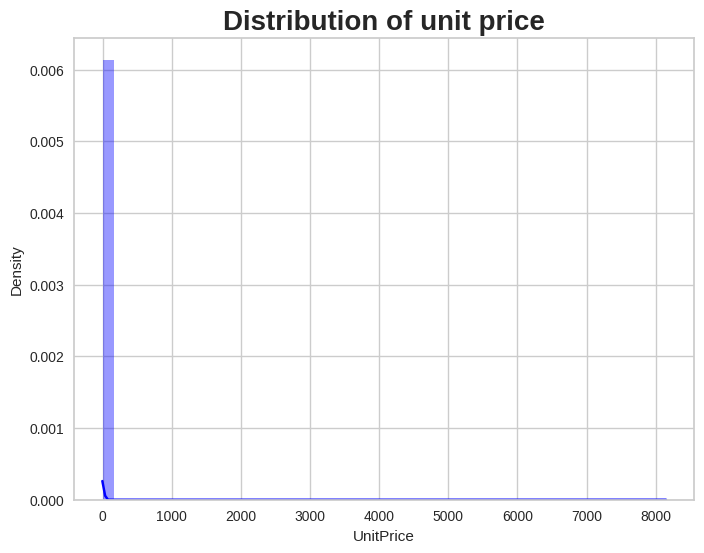

In [67]:
#Distribution of unit price
# Set the figure size for the plot
plt.figure(figsize=(8,6))
# Set the plot title
plt.title('Distribution of unit price', size=20, fontweight='bold')

# Plot the distribution of Quantity data
sns.distplot(df2['UnitPrice'], color='blue')

# Display the plot
plt.show('jpg')

##### What all outlier treatment techniques have you used and why did you use those techniques?

there are many wholesalers in our data. So, the ordered quantities and unitprice have lot of variance. Therefore, we don't remove the outliers from the data.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [68]:
# Manipulate Features to minimize feature correlation and create new features

# create a new column 'total_cost' in the dataframe
df2['total_cost'] = df2['Quantity'] * df2['UnitPrice']

In [69]:
df2.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday   

      Month  Year      Time  Hour  total_cost  
0  December  2010  08:26:00     8       15.30  
1  December  2010  08:26:00     8       20.34  
2  December  2010  08:26:00     8       22.00

#Recency,Frequency and Monetary analysis



In [70]:
# Import the datetime module as "dt" for easier use
import time
import datetime as dt

In [71]:
# Getting the latest value of the 'InvoiceDate' column
latest_date = df2 ['InvoiceDate'].max()

# Output the result
print(latest_date)


2011-12-09 12:50:00


In [72]:
# Calculate recency
recency_df = df2.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['recency'] = (latest_date - recency_df['InvoiceDate']).dt.days

In [73]:
# Calculate frequency
frequency_df = df2.groupby('CustomerID')['InvoiceDate'].count().reset_index()
frequency_df = frequency_df.rename(columns={'InvoiceDate': 'frequency'})


In [74]:
# Calculate monetary
monetary_df = df2.groupby('CustomerID')['total_cost'].sum().reset_index()
monetary_df.rename(columns={'total_cost': 'Monetary'}, inplace=True)


In [75]:
# Combine the RFM values into a single dataframe
rfm_df = pd.merge(recency_df, frequency_df, on='CustomerID')
rfm_df = pd.merge(rfm_df, monetary_df, on='CustomerID')

In [76]:
rfm_df.head(5)

CustomerID         InvoiceDate  recency  frequency  Monetary
0     12346.0 2011-01-18 10:01:00      325          1  77183.60
1     12347.0 2011-12-07 15:52:00        1        182   4310.00
2     12348.0 2011-09-25 13:13:00       74         31   1797.24
3     12349.0 2011-11-21 09:51:00       18         73   1757.55
4     12350.0 2011-02-02 16:01:00      309         17    334.40

In [77]:
# Define the quartile cutoffs
quartiles = rfm_df[['recency', 'frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])

# Assign scores to each value based on quartile cutoffs
def r_score(x, c):
    if x <= c[0.25]:
        return 1
    elif x <= c[0.5]:
        return 2
    elif x <= c[0.75]:
        return 3
    else:
        return 4

In [78]:
def fm_score(x, c):
    if x <= c[0.25]:
        return 4
    elif x <= c[0.5]:
        return 3
    elif x <= c[0.75]:
        return 2
    else:
        return 1

In [79]:
rfm_df['r_score'] = rfm_df['recency'].apply(r_score, c=quartiles['recency'])
rfm_df['f_score'] = rfm_df['frequency'].apply(fm_score, c=quartiles['frequency'])
rfm_df['m_score'] = rfm_df['Monetary'].apply(fm_score, c=quartiles['Monetary'])

In [80]:
rfm_df.head(5)

CustomerID         InvoiceDate  recency  frequency  Monetary  r_score  \
0     12346.0 2011-01-18 10:01:00      325          1  77183.60        4   
1     12347.0 2011-12-07 15:52:00        1        182   4310.00        1   
2     12348.0 2011-09-25 13:13:00       74         31   1797.24        3   
3     12349.0 2011-11-21 09:51:00       18         73   1757.55        2   
4     12350.0 2011-02-02 16:01:00      309         17    334.40        4   

   f_score  m_score  
0        4        1  
1        1        1  
2        3        1  
3        2        1  
4        4        3

In [81]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.r_score.map(str) + rfm_df.f_score.map(str) + rfm_df.m_score.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['r_score', 'f_score', 'm_score']].sum(axis = 1)
rfm_df.head()

CustomerID         InvoiceDate  recency  frequency  Monetary  r_score  \
0     12346.0 2011-01-18 10:01:00      325          1  77183.60        4   
1     12347.0 2011-12-07 15:52:00        1        182   4310.00        1   
2     12348.0 2011-09-25 13:13:00       74         31   1797.24        3   
3     12349.0 2011-11-21 09:51:00       18         73   1757.55        2   
4     12350.0 2011-02-02 16:01:00      309         17    334.40        4   

   f_score  m_score RFMGroup  RFMScore  
0        4        1      441         9  
1        1        1      111         3  
2        3        1      331         7  
3        2        1      221         5  
4        4        3      443        11

<Axes: xlabel='Monetary', ylabel='Density'>

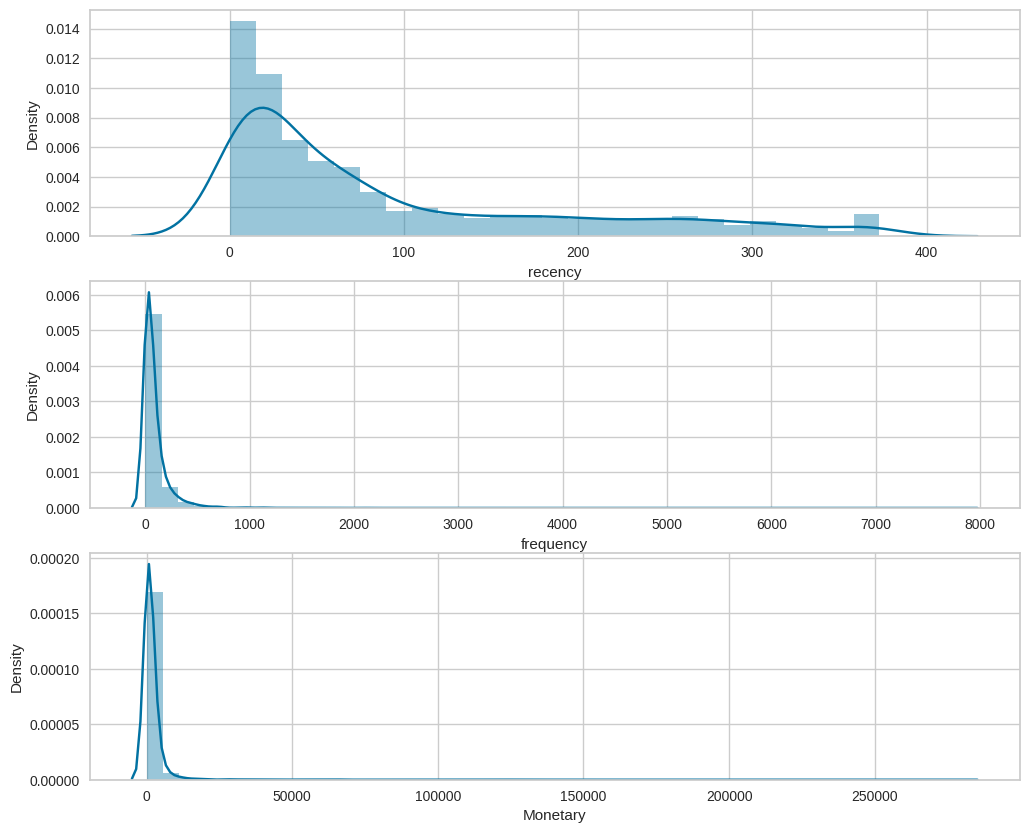

In [82]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm_df['recency'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm_df['frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary'])

#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

We have utilized the RFM (Recency, Frequency, Monetary) method to derive features for customer segmentation based on their purchasing behavior.

Recency is a metric that gauges the time elapsed since a customer's last purchase. The more recently a customer has made a purchase, the more valuable they are considered. Recency is typically measured in days since the last purchase.

Frequency is a metric that measures how frequently a customer purchases. Customers who purchase more frequently are deemed more valuable than those who purchase less often. Frequency is often measured over a specific time period, such as a year or quarter, and is based on the total number of purchases made.

Monetary value measures the total amount a customer has spent on purchases. Customers who have spent more money are considered more valuable than those who have spent less money.

To obtain an optimal solution, we will employ various machine learning models based on the derived features from the RFM analysis.

### 5. Data Transformation

In [83]:
# Transform Your data

from sklearn import preprocessing
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns
rfm_df['recency'] = [handle_neg_n_zero(x) for x in rfm_df.recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

In [84]:
#applying log transformation

from numpy import math
rfm_df['recency_log'] = rfm_df['recency'].apply(math.log)
rfm_df['frequency_log'] = rfm_df['frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

<Axes: xlabel='Monetary_log', ylabel='Density'>

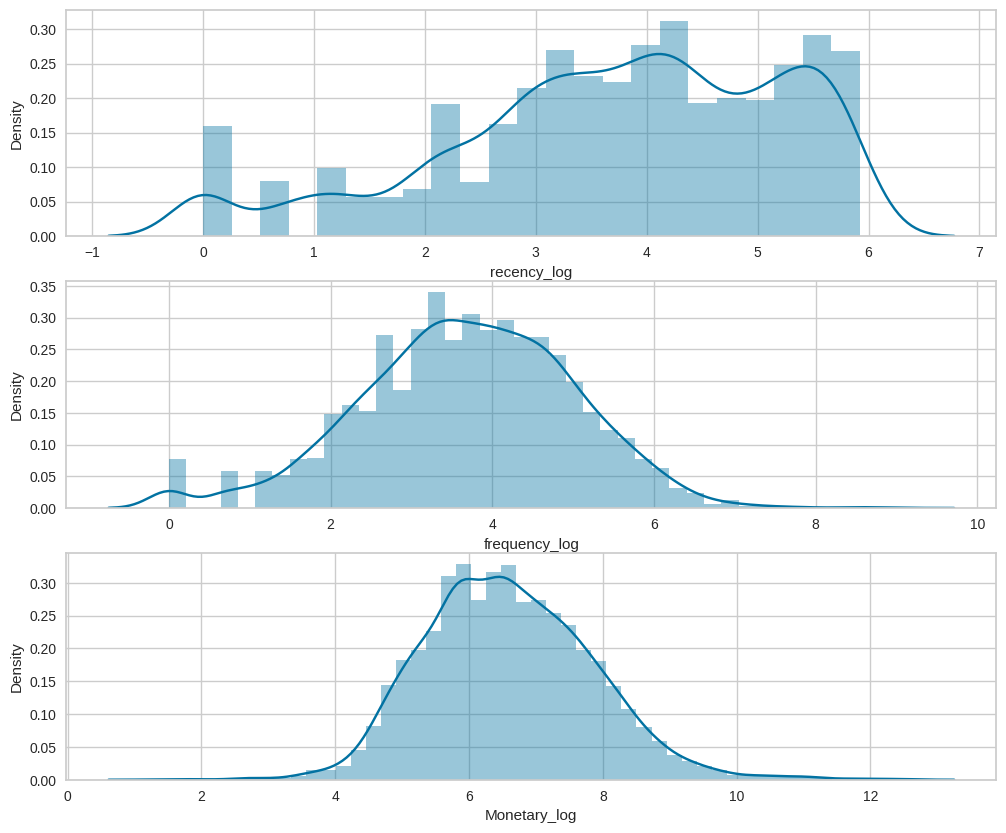

In [85]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm_df['recency_log'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm_df['frequency_log'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary_log'])

In [86]:
rfm_df.head(5)

CustomerID         InvoiceDate  recency  frequency  Monetary  r_score  \
0     12346.0 2011-01-18 10:01:00      325          1  77183.60        4   
1     12347.0 2011-12-07 15:52:00        1        182   4310.00        1   
2     12348.0 2011-09-25 13:13:00       74         31   1797.24        3   
3     12349.0 2011-11-21 09:51:00       18         73   1757.55        2   
4     12350.0 2011-02-02 16:01:00      309         17    334.40        4   

   f_score  m_score RFMGroup  RFMScore  recency_log  frequency_log  \
0        4        1      441         9     5.783825       0.000000   
1        1        1      111         3     0.000000       5.204007   
2        3        1      331         7     4.304065       3.433987   
3        2        1      221         5     2.890372       4.290459   
4        4        3      443        11     5.733341       2.833213   

   Monetary_log  
0     11.253942  
1      8.368693  
2      7.494007  
3      7.471676  
4      5.812338

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, some of the features in our data set are right-skewed, so we need to remove them to improve the accuracy of our model's predictions. Therefore, to eliminate the skewness, we used log and exponential transformation.

In [87]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

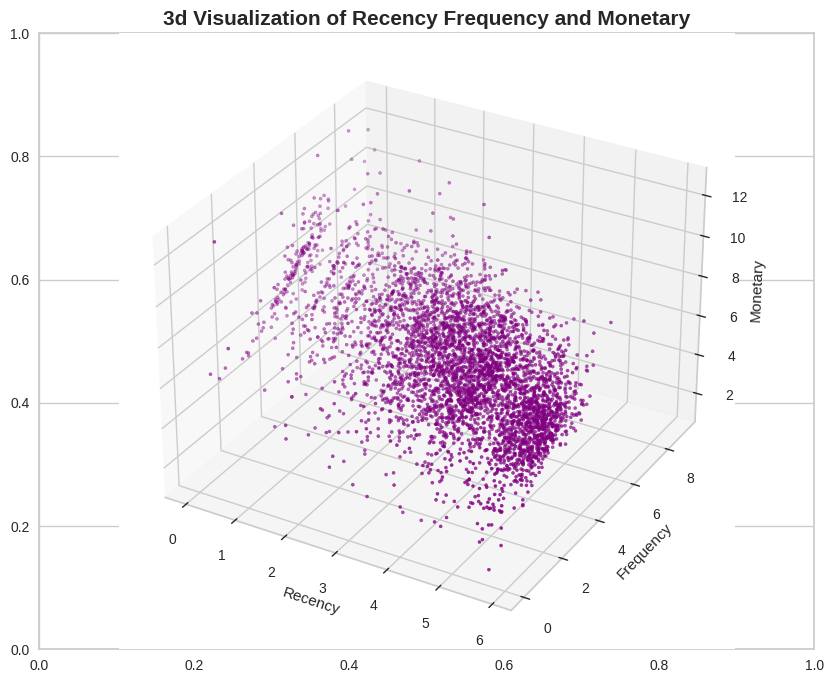

In [88]:
#visualizing RFM
fig=plt.figure(figsize=(10,8))
plt.title('3d Visualization of Recency Frequency and Monetary', fontweight='bold',size=15)
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df['recency_log']
ys=rfm_df['frequency_log']
zs=rfm_df['Monetary_log']

ax.scatter3D(xs,ys,zs,s=5, color ='purple')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

#### 6. Data Scaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
# Scaling your data
# Define the features to use for K-means
columns = ['recency_log', 'frequency_log', 'Monetary_log']

# Standardize the feature values
scaler = StandardScaler()
rfm_df[columns] = scaler.fit_transform(rfm_df[columns].values)

In [91]:
rfm_df.head(5)

CustomerID         InvoiceDate  recency  frequency  Monetary  r_score  \
0     12346.0 2011-01-18 10:01:00      325          1  77183.60        4   
1     12347.0 2011-12-07 15:52:00        1        182   4310.00        1   
2     12348.0 2011-09-25 13:13:00       74         31   1797.24        3   
3     12349.0 2011-11-21 09:51:00       18         73   1757.55        2   
4     12350.0 2011-02-02 16:01:00      309         17    334.40        4   

   f_score  m_score RFMGroup  RFMScore  recency_log  frequency_log  \
0        4        1      441         9     1.373353      -2.775160   
1        1        1      111         3    -2.451384       1.149549   
2        3        1      331         7     0.394815      -0.185347   
3        2        1      221         5    -0.540035       0.460579   
4        4        3      443        11     1.339969      -0.638433   

   Monetary_log  
0      3.698719  
1      1.410201  
2      0.716419  
3      0.698706  
4     -0.617446

##### Which method have you used to scale you data and why?



Some of the features in our data set are right-skewed, so we need to remove them to improve the accuracy of our model's predictions. Therefore, to eliminate the skewness, we used StandardScaler.


###7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, there is no need to use Dimesionality Reduction becouse we have already converted our data into only three features that is Recency, Frequency and Monatory.

## ***7. ML Model Implementation***

### ML Model - 1

**ML Model - 1-K-Means Clustering using Slihoutte Score**



Writing code for applying Silhouette Score Method on Recency frequency and Monetary


In [92]:
#assigning features
features_rec_mon=['recency_log','Monetary_log', 'frequency_log']
X=rfm_df[features_rec_mon]

In [93]:
from typing import Tuple
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def cluster_eval_score(X: pd.DataFrame, range_n_clusters: Tuple[int, int]) -> pd.DataFrame:
    """
    This function evaluates the silhouette score for different numbers of clusters using KMeans.

    Parameters:
    X (pandas DataFrame): Input data.
    range_n_clusters (tuple): Range of numbers of clusters to evaluate.

    Returns:
    eval_score (pandas DataFrame): DataFrame containing the silhouette score for each number of clusters.
    """

    eval_score = pd.DataFrame(columns=['n_clusters', 'silhouette_score'])

    for n_clusters in range(range_n_clusters[0], range_n_clusters[1]+1):
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(X)
        centers = clusterer.cluster_centers_

        score = silhouette_score(X, preds)
        eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    plt.plot(eval_score['n_clusters'], eval_score['silhouette_score'])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()

    return eval_score



#1.   Applying Silhouette Score Method on Recency frequency, and monetary



For n_clusters = 2, silhouette score is 0.39556819476799293
For n_clusters = 3, silhouette score is 0.30672241562822844
For n_clusters = 4, silhouette score is 0.3049362002577273
For n_clusters = 5, silhouette score is 0.2801101914069405
For n_clusters = 6, silhouette score is 0.2792744609031308
For n_clusters = 7, silhouette score is 0.26825162115868817
For n_clusters = 8, silhouette score is 0.26797804168414074
For n_clusters = 9, silhouette score is 0.2515027395628507
For n_clusters = 10, silhouette score is 0.2748096496618351
For n_clusters = 11, silhouette score is 0.25915908443217517
For n_clusters = 12, silhouette score is 0.26691834012000704
For n_clusters = 13, silhouette score is 0.2642747912116084
For n_clusters = 14, silhouette score is 0.26056828269545657
For n_clusters = 15, silhouette score is 0.25644905621497466


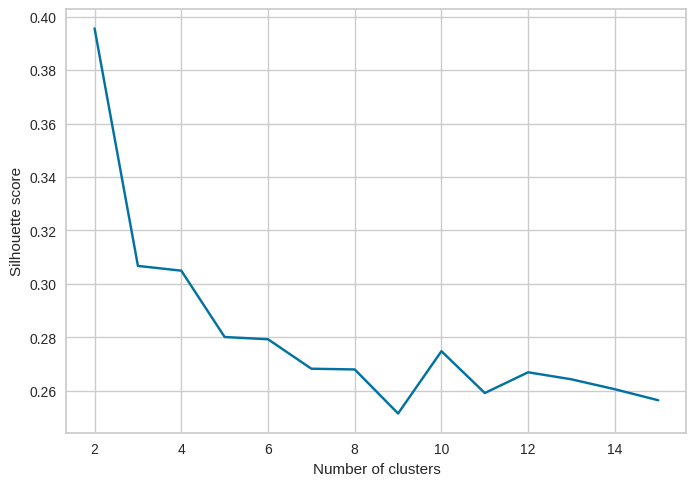

In [94]:
eval_score = cluster_eval_score(X, (2, 15))

For n_clusters = 2, silhouette score is 0.3954376896119063
For n_clusters = 3, silhouette score is 0.30672241562822844
For n_clusters = 4, silhouette score is 0.30402478599027144
For n_clusters = 5, silhouette score is 0.27976610878689356
For n_clusters = 6, silhouette score is 0.27990583575936984
For n_clusters = 7, silhouette score is 0.26889979471686665
For n_clusters = 8, silhouette score is 0.2669940713252951
For n_clusters = 9, silhouette score is 0.251906907381706
For n_clusters = 10, silhouette score is 0.2523876551973821
For n_clusters = 11, silhouette score is 0.2674138175316687
For n_clusters = 12, silhouette score is 0.26610163354281174
For n_clusters = 13, silhouette score is 0.26366930237780634
For n_clusters = 14, silhouette score is 0.2618707328139162
For n_clusters = 15, silhouette score is 0.2590091919500378


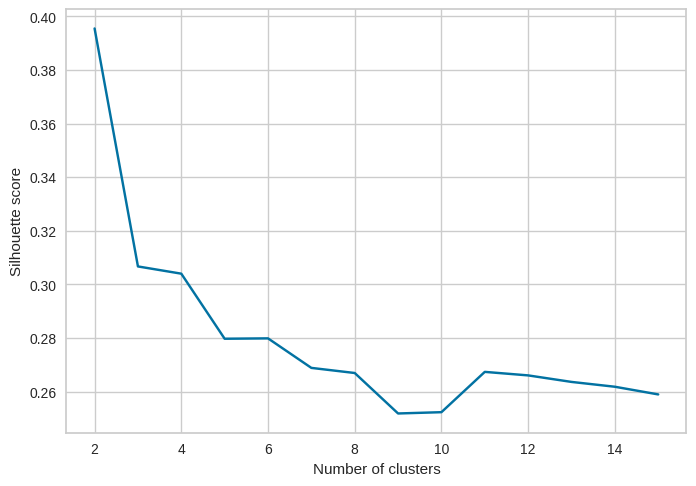

In [95]:
eval_score = cluster_eval_score(X, (2,15))



#2.   Applying Silhouette Score Method on Recency and monetary



In [96]:
features_rec_mon=['recency_log','Monetary_log']
X1=rfm_df[features_rec_mon]

For n_clusters = 2, silhouette score is 0.4218781508340076
For n_clusters = 3, silhouette score is 0.348663447574151
For n_clusters = 4, silhouette score is 0.3655781907753984
For n_clusters = 5, silhouette score is 0.33936586820012365
For n_clusters = 6, silhouette score is 0.3448048027829411
For n_clusters = 7, silhouette score is 0.34880874928345856
For n_clusters = 8, silhouette score is 0.3411816213926858
For n_clusters = 9, silhouette score is 0.3454073774699757
For n_clusters = 10, silhouette score is 0.349182010625126
For n_clusters = 11, silhouette score is 0.3405244991713809
For n_clusters = 12, silhouette score is 0.3388457276072751
For n_clusters = 13, silhouette score is 0.342295193845329
For n_clusters = 14, silhouette score is 0.3396287283064306
For n_clusters = 15, silhouette score is 0.3423960688148549


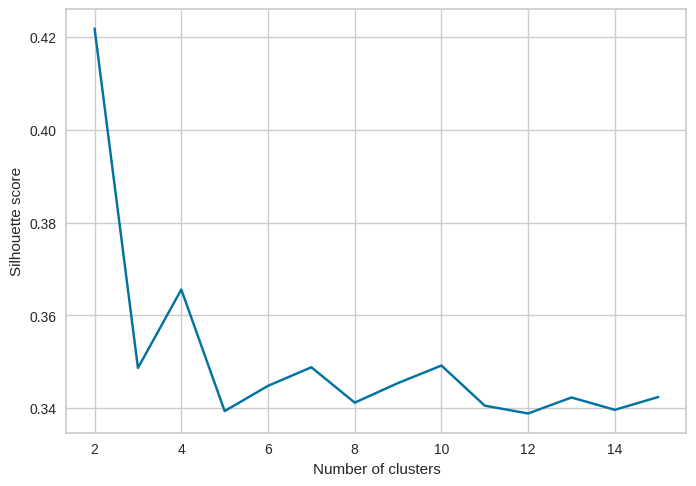

In [97]:
eval_score = cluster_eval_score(X1, (2, 15))



#3.   Applying Silhouette Score Method on frequency and Monetary


In [98]:
features_rec_mon=['frequency_log','Monetary_log']
X2=rfm_df[features_rec_mon]

For n_clusters = 2, silhouette score is 0.47853570950660274
For n_clusters = 3, silhouette score is 0.40764120562174433
For n_clusters = 4, silhouette score is 0.37131958145890936
For n_clusters = 5, silhouette score is 0.3425106484888668
For n_clusters = 6, silhouette score is 0.3603357976644557
For n_clusters = 7, silhouette score is 0.34219146253722615
For n_clusters = 8, silhouette score is 0.3444968957715607
For n_clusters = 9, silhouette score is 0.3461675530462493
For n_clusters = 10, silhouette score is 0.3609297624957865
For n_clusters = 11, silhouette score is 0.34671769080087544
For n_clusters = 12, silhouette score is 0.3536214602587709
For n_clusters = 13, silhouette score is 0.36245437312842804
For n_clusters = 14, silhouette score is 0.35394340195707175
For n_clusters = 15, silhouette score is 0.3619950306200551


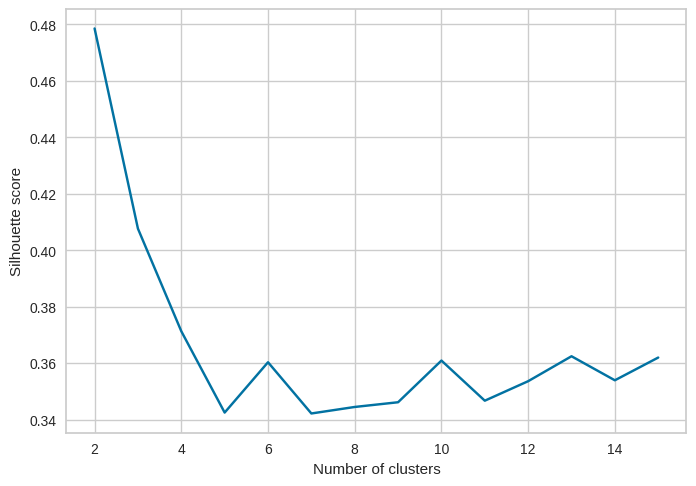

In [99]:
eval_score = cluster_eval_score(X2, (2, 15))



#4.   visulization of cluster through scatter plot-based on silhoutte score



In [100]:
from typing import Tuple
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def cluster_eval_score(X: pd.DataFrame, range_n_clusters: Tuple[int, int]) -> pd.DataFrame:
    """
    This function evaluates the silhouette score for different numbers of clusters using KMeans.

    Parameters:
    X (pandas DataFrame): Input data.
    range_n_clusters (tuple): Range of numbers of clusters to evaluate.

    Returns:
    eval_score (pandas DataFrame): DataFrame containing the silhouette score for each number of clusters.
    """

    eval_score = pd.DataFrame(columns=['n_clusters', 'silhouette_score'])

    for n_clusters in range(range_n_clusters[0], range_n_clusters[1]+1):
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(X)
        centers = clusterer.cluster_centers_

        score = silhouette_score(X, preds)
        eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

        # Plot scatter plot of the clusters
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 6)
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=preds, cmap=plt.cm.nipy_spectral)
        ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=200,
                    linewidths=3, color='red', zorder=10)
        ax.set_title("KMeans Clustering with {} Clusters".format(n_clusters))
        plt.show('jpg')

    return eval_score

For n_clusters = 2, silhouette score is 0.47853570950660274


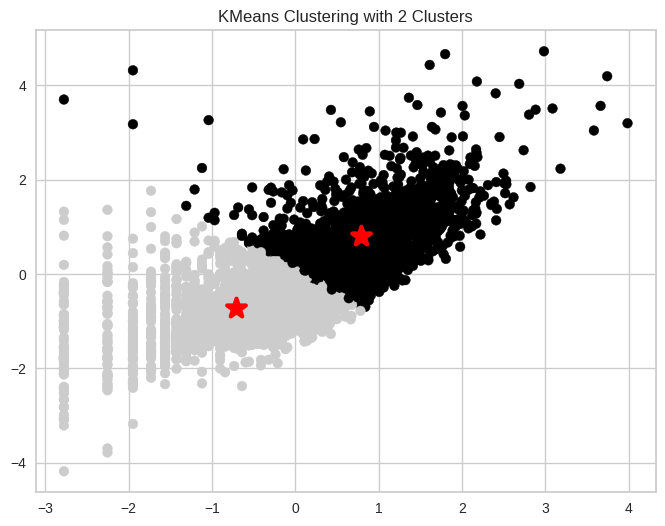

For n_clusters = 3, silhouette score is 0.40764120562174433


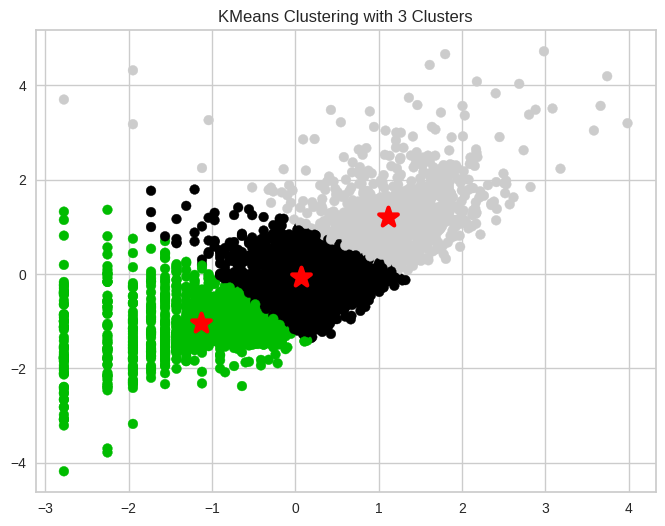

For n_clusters = 4, silhouette score is 0.371934744984464


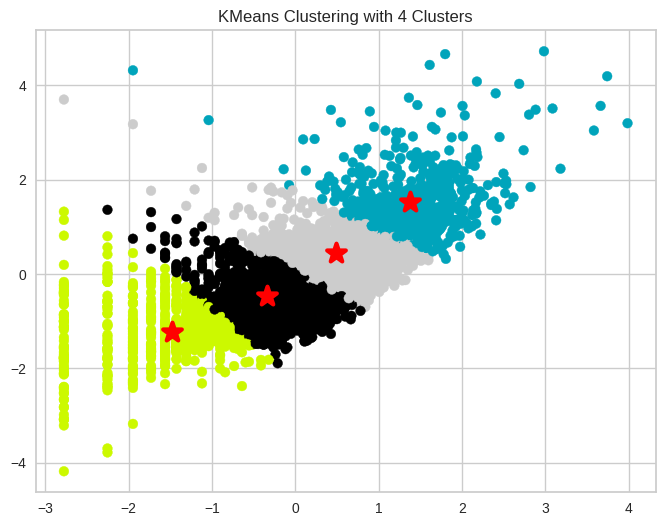

For n_clusters = 5, silhouette score is 0.3451326794883678


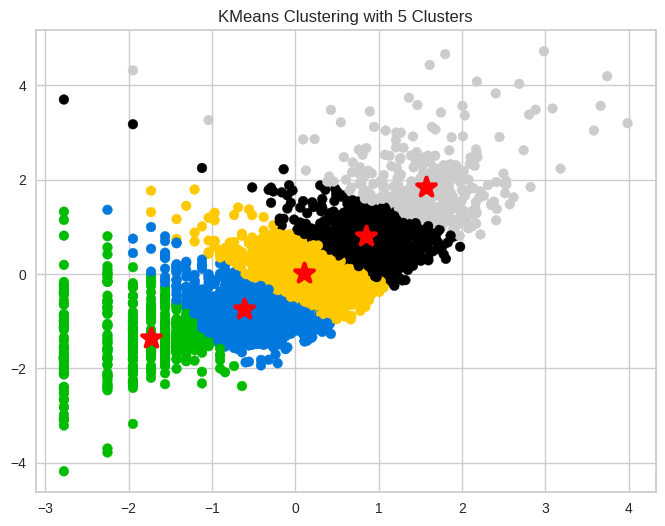

For n_clusters = 6, silhouette score is 0.3594899695159945


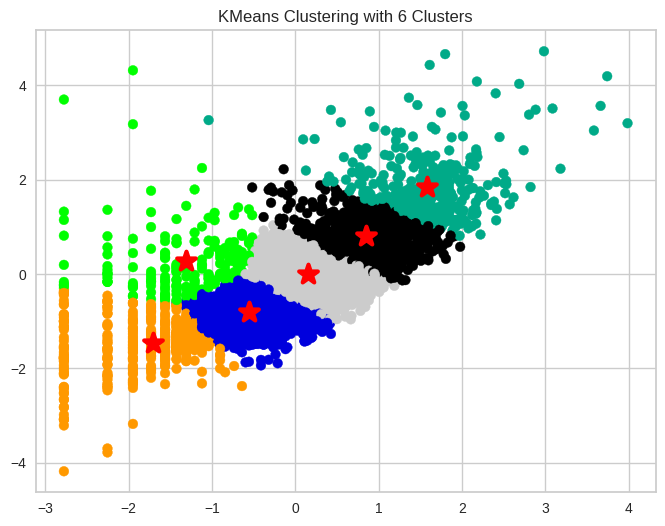

For n_clusters = 7, silhouette score is 0.33913934076761587


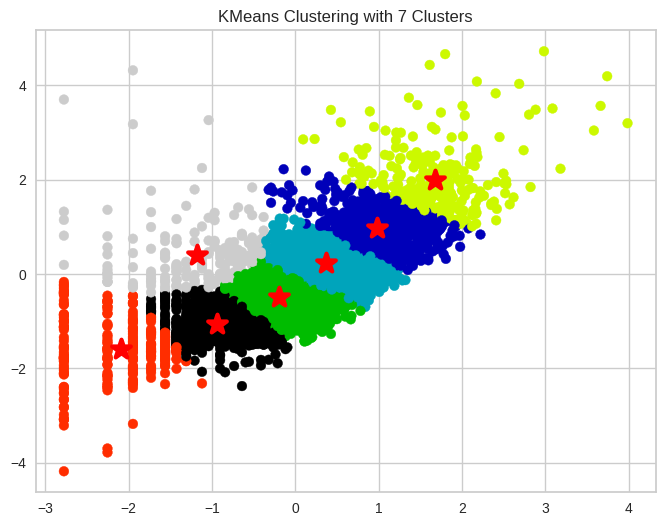

For n_clusters = 8, silhouette score is 0.351303903397664


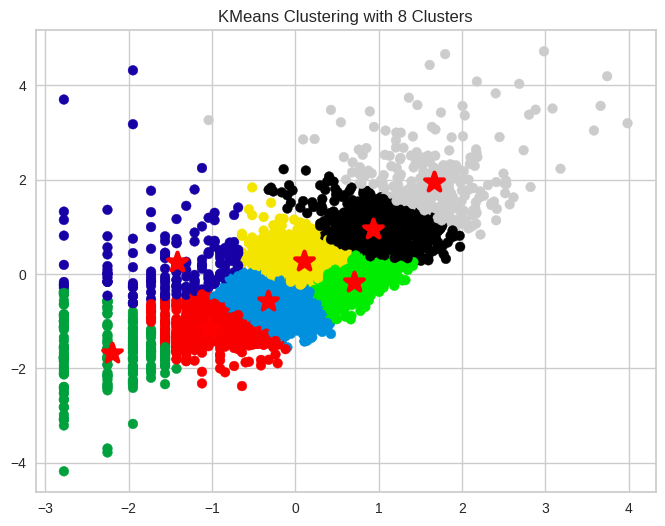

For n_clusters = 9, silhouette score is 0.3454260969712405


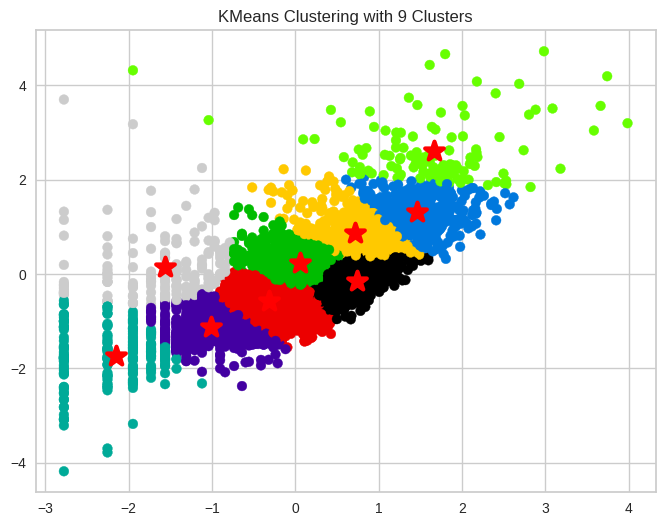

For n_clusters = 10, silhouette score is 0.3594513521639724


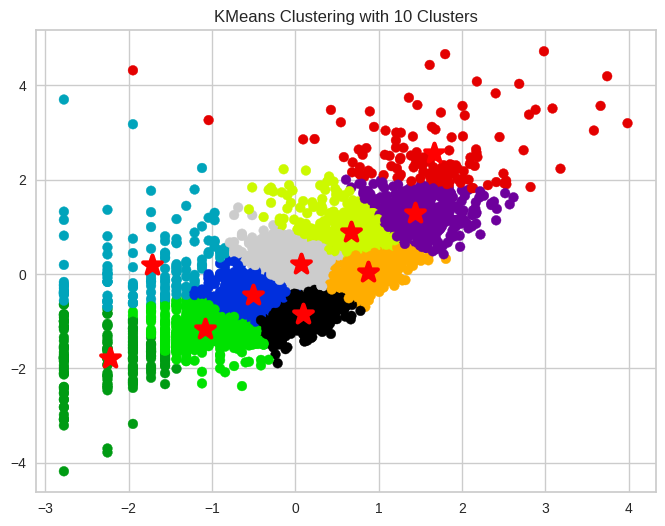

For n_clusters = 11, silhouette score is 0.3691640297321252


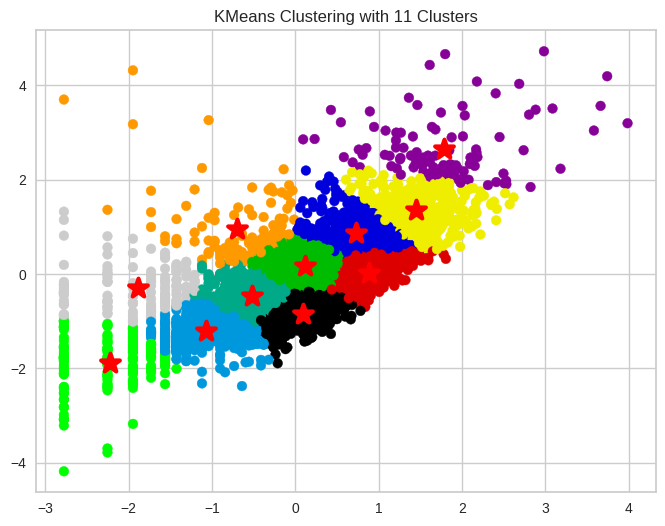

For n_clusters = 12, silhouette score is 0.3546310207839522


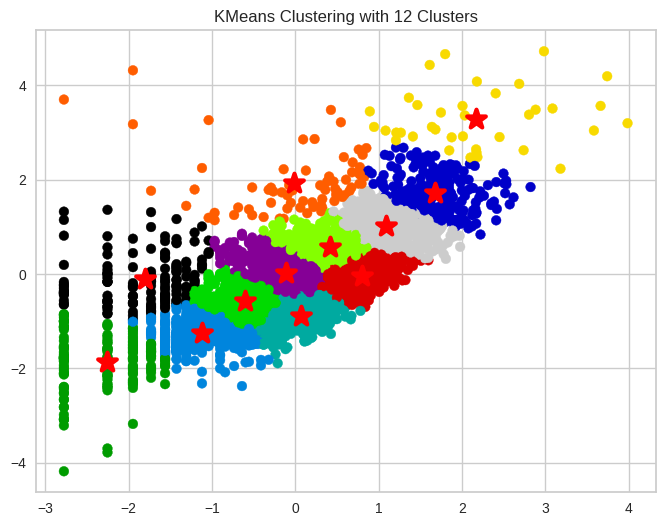

For n_clusters = 13, silhouette score is 0.36276363518816784


For n_clusters = 14, silhouette score is 0.3501183902920449


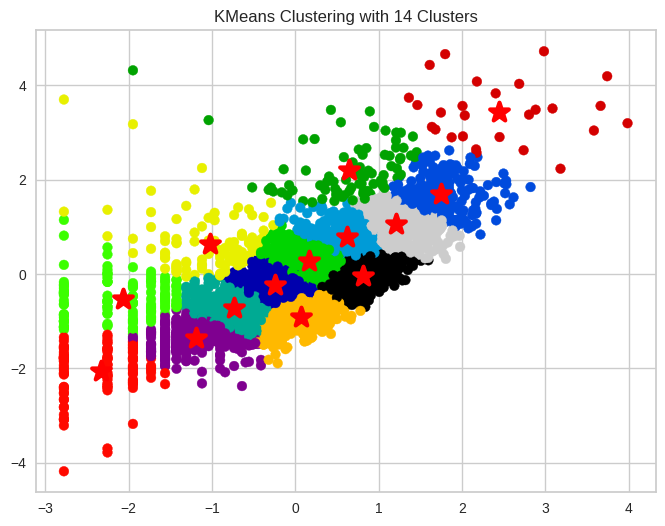

For n_clusters = 15, silhouette score is 0.3621176886898661


In [101]:
eval_score = cluster_eval_score(X2, (2,15))

In [102]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(5)

CustomerID         InvoiceDate  recency  frequency  Monetary  r_score  \
0     12346.0 2011-01-18 10:01:00      325          1  77183.60        4   
1     12347.0 2011-12-07 15:52:00        1        182   4310.00        1   
2     12348.0 2011-09-25 13:13:00       74         31   1797.24        3   
3     12349.0 2011-11-21 09:51:00       18         73   1757.55        2   
4     12350.0 2011-02-02 16:01:00      309         17    334.40        4   

   f_score  m_score RFMGroup  RFMScore  recency_log  frequency_log  \
0        4        1      441         9     1.373353      -2.775160   
1        1        1      111         3    -2.451384       1.149549   
2        3        1      331         7     0.394815      -0.185347   
3        2        1      221         5    -0.540035       0.460579   
4        4        3      443        11     1.339969      -0.638433   

   Monetary_log  Cluster  
0      3.698719        1  
1      1.410201        0  
2      0.716419        1  
3      0.698706        0  
4     -0.617446        1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-means clustering is a popular unsupervised machine learning technique used to cluster similar data points together based on their attributes. It is an iterative algorithm that aims to minimize the sum of squared distances between each data point and its assigned cluster centroid.

The output of the algorithm is K cluster centroids and the assignment of each data point to its corresponding cluster.

K-means is a simple and efficient clustering algorithm that works well on large datasets. However, it is sensitive to the initial placement of the centroids, and the optimal number of clusters may not always be known in advance.

In our instance, we identified two optimal clusters that corresponded to high Silhoutte scores however, we can see that the cluster is not clearly separated.

### ML Model - 2-K-Means Clustering using Elbow Method

1.   Applying Elbow Method on Recency, Frequency, and Monetary

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def find_optimal_k(X, max_clusters=15):
    """
    Given a data matrix X, applies the elbow method to determine the optimal number of clusters.

    Parameters:
    -----------
    X: numpy.ndarray or pandas.DataFrame
        The data matrix to cluster.
    max_clusters: int, optional (default=15)
        The maximum number of clusters to consider.

    Returns:
    --------
    int
        The optimal number of clusters as determined by the elbow method.
    """

    sum_of_sq_dist = {}

    for k in range(1, max_clusters + 1):
        km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
        km = km.fit(X)
        sum_of_sq_dist[k] = km.inertia_

    sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
    plt.xlabel('Number of Clusters(k)')
    plt.ylabel('Sum of Square Distances')
    plt.title('Elbow Method For Optimal k')

    # Find the optimal number of clusters based on the elbow plot
    optimal_k = 1
    for k in range(2, max_clusters + 1):
        slope = (sum_of_sq_dist[k] - sum_of_sq_dist[k-1]) / (k - (k-1))
        if slope < 0.05 * sum_of_sq_dist[1]:
            optimal_k = k
            break

    # Print the result
    print(f'For n_clusters = {optimal_k}, Elbow Method Score is approximately {sum_of_sq_dist[optimal_k]:.4f}.')

    plt.show()

    return optimal_k


For n_clusters = 2, Elbow Method Score is approximately 6898.3369.


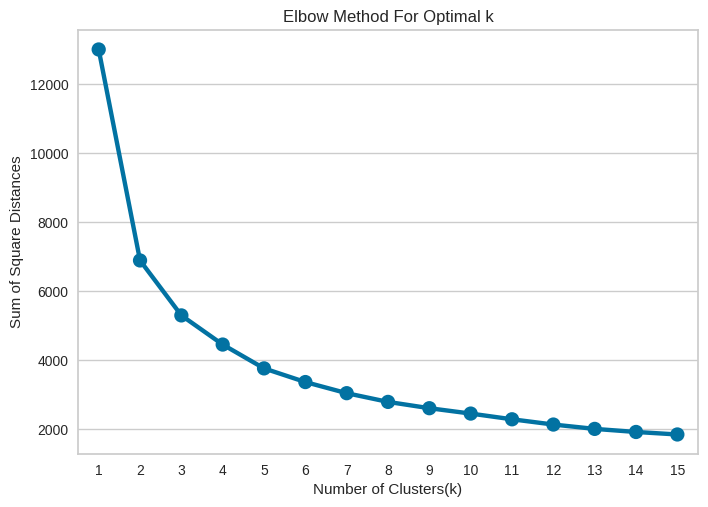

In [104]:
optimal_k = find_optimal_k(X)

2. Applying Elbow Score Method on Recency and Monetary

In [105]:
optimal_k = find_optimal_k(X1)

For n_clusters = 2, Elbow Method Score is approximately 4478.5236.


3. Applying Elbow Method on Frequency and Monetary

For n_clusters = 2, Elbow Method Score is approximately 3791.6220.


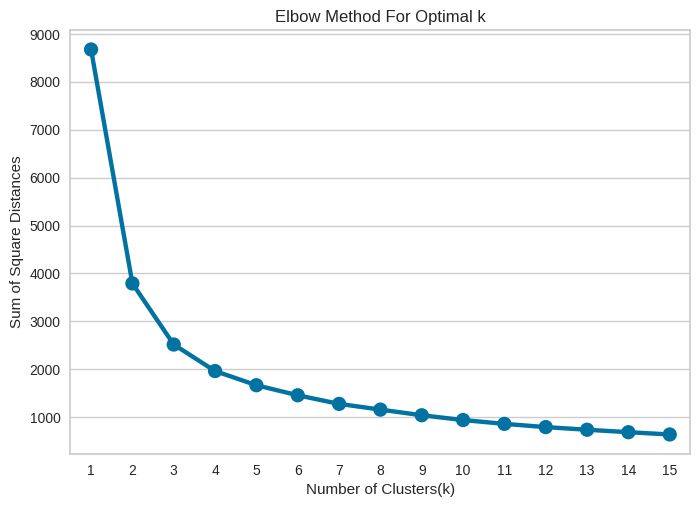

In [106]:
optimal_k = find_optimal_k(X2)

4. visualization through scatter plot

In [107]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X1)
y_kmeans= km.predict(X1)

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

def plot_cluster_scatter(X):
    """
    This function plots the scatter plot for each number of clusters based on KMeans clustering.

    Parameters:
    X (pandas DataFrame): Input data.

    Returns:
    None.
    """

    # Set the figure size and title for the scatter plot
    plt.figure(figsize=(16,12))
    plt.suptitle('Customer Segmentation Based on RFM Features', fontsize=16)

    # Create a loop to plot the scatter plot for each number of clusters
    for n_clusters in range(2, 6):
        # Initialize the KMeans model with the desired number of clusters
        km = KMeans(n_clusters=n_clusters, random_state=42)
        # Fit the model to the input data X
        y_kmeans = km.fit_predict(X)

        # Create a subplot for the current number of clusters
        plt.subplot(2, 2, n_clusters-1)

        # Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

        # Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
        centers = km.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')

        # Set the x-axis and y-axis labels
        plt.xlabel('Recency')
        plt.ylabel('Frequency')

        # Set the title for the current subplot
        plt.title('Cluster {} ({:,} customers)'.format(n_clusters, len(y_kmeans)))

        # Add a color bar to the plot to show the correspondence between the colors and the cluster labels
        color_bar = plt.colorbar()
        color_bar.set_ticks(np.unique(y_kmeans))
        color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

    # Adjust the spacing between subplots and display the plot
    plt.tight_layout()
    plt.show('jpg')


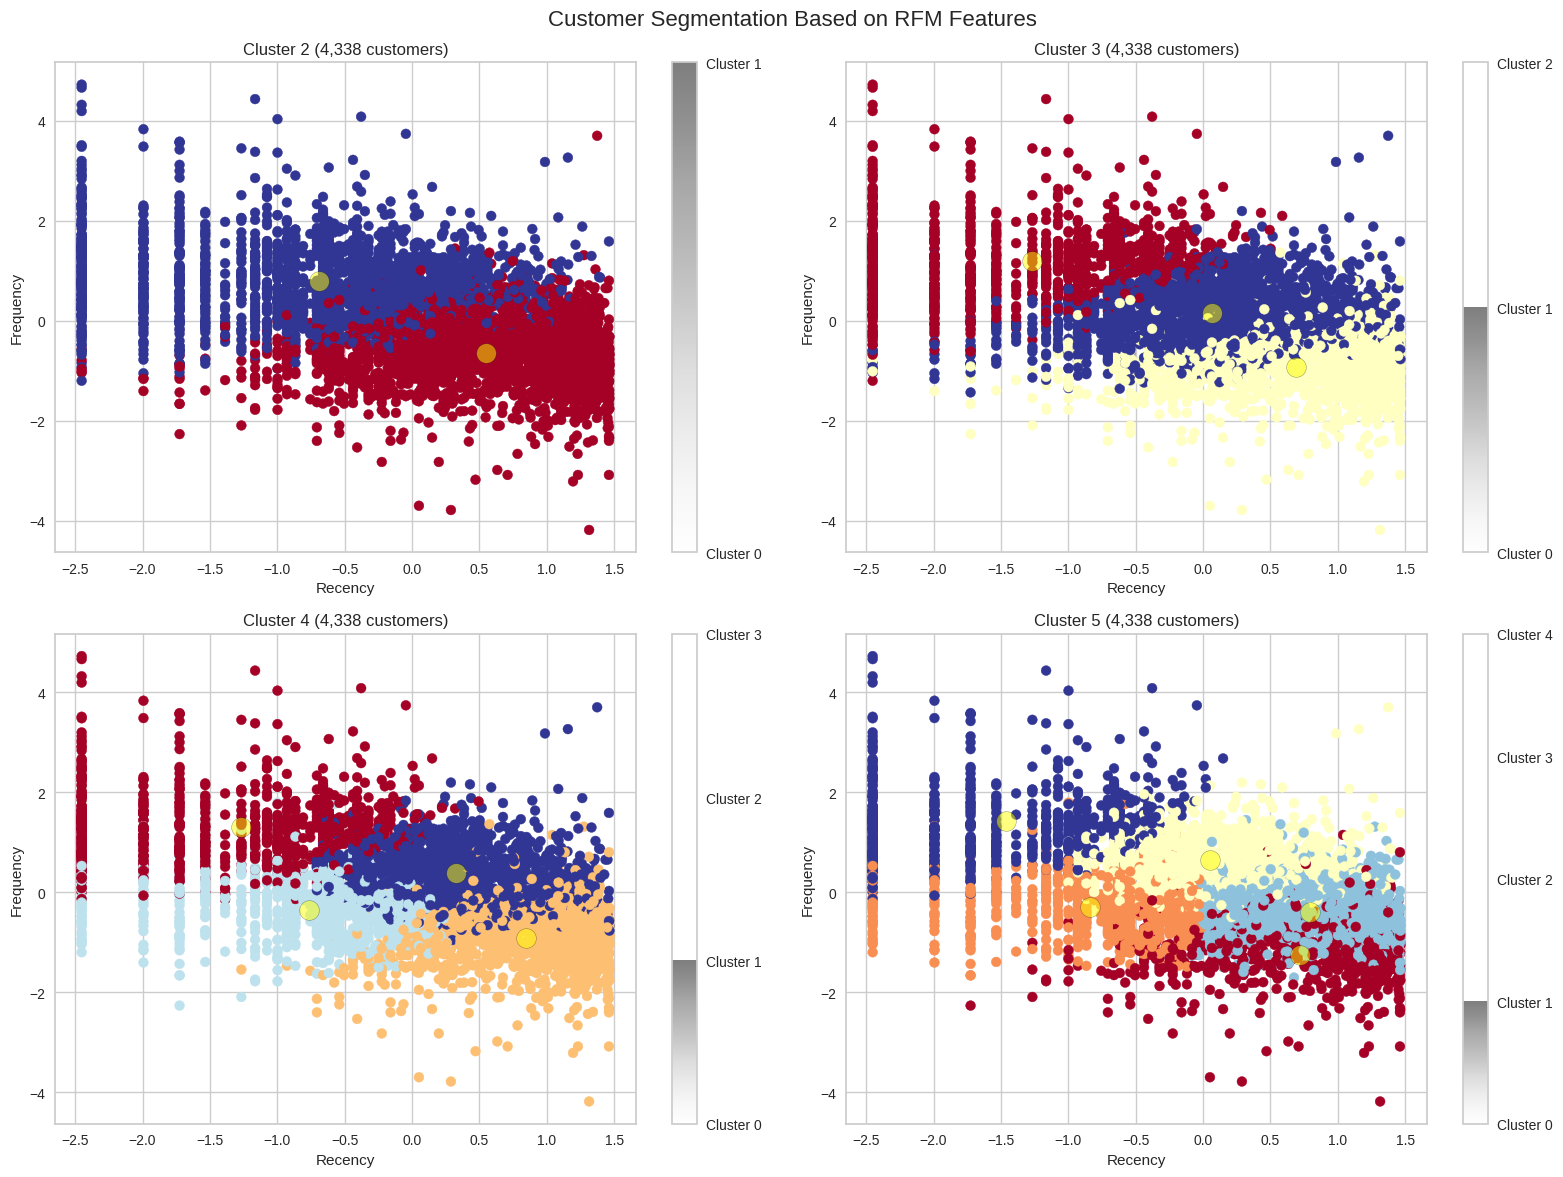

In [109]:
plot_cluster_scatter(X)


In [110]:
plot_cluster_scatter(X1)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

The elbow method is a common technique used to determine the optimal number of clusters in a k-means clustering algorithm. The method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters, and selecting the number of clusters at the "elbow point" where the rate of decrease in WCSS slows down.

In our case, we have observed that the WCSS is maximum for one cluster in each cases correspoding features, which suggests that the data points are not well-separated and do not form distinct clusters. However, selecting only one cluster is not a practical solution, as it does not provide any meaningful insights or segmentation.

When we tried with two clusters, we noticed that the data points are still not well-separated, indicating that the clustering algorithm may not be suitable for this dataset.

# ML Model - 3-Applying DBSCAN

In [132]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def dbscan_cluster(X, eps=0.5, min_samples=15):
    """
    Given a data matrix X, applies the DBSCAN clustering algorithm and returns the predicted labels.

    Parameters:
    -----------
    X: numpy.ndarray or pandas.DataFrame
        The data matrix to cluster.
    eps: float, optional (default=0.5)
        The maximum distance between two samples for them to be considered as in the same neighborhood.
    min_samples: int, optional (default=15)
        The number of samples in a neighborhood for a point to be considered as a core point.

    Returns:
    --------
    numpy.ndarray
        The predicted labels for each sample in X.
    """

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)

    plt.figure(figsize=(13,8))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_pred)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('DBSCAN Clustering')
    plt.show()

    print("Predicted Labels:")
    print(y_pred)

    return y_pred


**1.Applying DBSCAN Method on Recency, Frequency, and Monetary**

In [133]:
y_pred = dbscan_cluster(X)


Predicted Labels:
[-1  0  0 ...  0  0  0]


**2. Applying DBSCAN Method on Recency and Monetary**

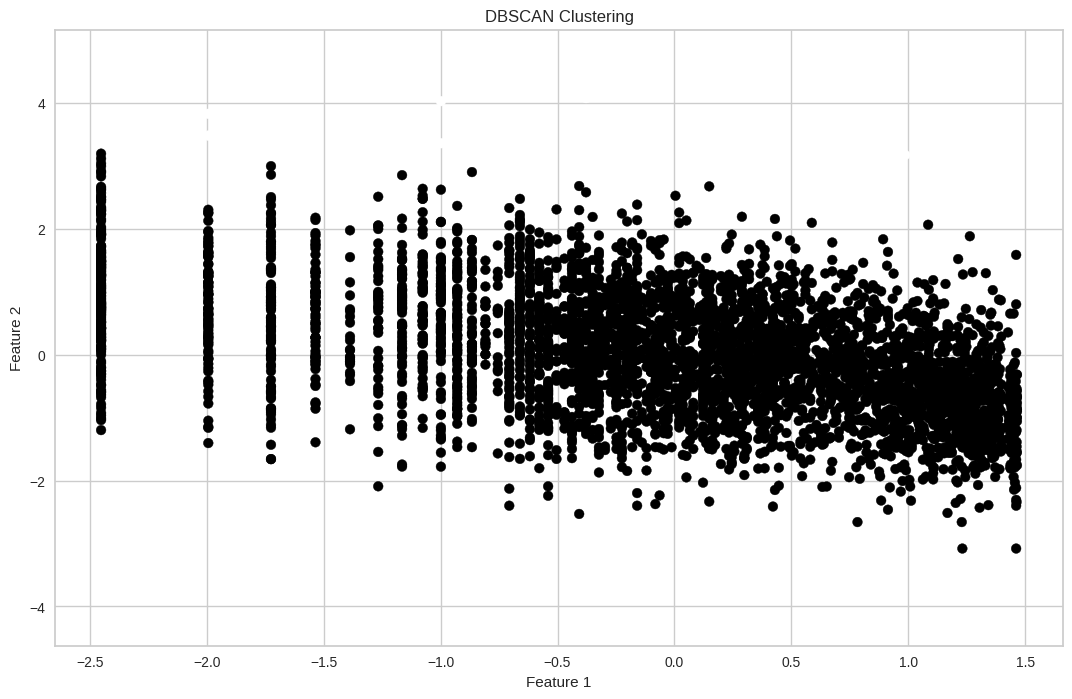

Predicted Labels:
[-1  0  0 ...  0  0  0]


In [134]:
y_pred = dbscan_cluster(X1)

**3.Applying DBSCAN Method on Recency and Frequency**

In [135]:
y_pred = dbscan_cluster(X2)


Predicted Labels:
[-1  0  0 ...  0  0  0]


Explain the ML Model used and it's performance .

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It is a popular clustering algorithm that groups together data points that are close to each other in a high-density region, while also identifying noise points that are not part of any cluster. DBSCAN works well with datasets that have irregular shapes and varying densities, and does not require a predetermined number of clusters.

The algorithm works by defining two parameters:

Epsilon (ε): the maximum distance between two points for them to be considered as part of the same cluster. Minimum points (MinPts): the minimum number of points required to form a dense region. The algorithm starts with an arbitrary data point and finds all its neighboring points that are within ε distance. If the number of neighboring points is greater than or equal to MinPts, then the data point is considered as part of a cluster. The algorithm then expands the cluster by finding all the neighboring points of the current point and repeating the process until no more points can be added. If a point has fewer than MinPts neighboring points, it is considered a noise point.

# ML Model - 4 -Applying Hierarchical Clustering

In [115]:
#importing important library
import scipy.cluster.hierarchy as sch
#writing code for HC plot
def plot_dendrogram(X):
    plt.figure(figsize=(13,8))
    dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean Distances')
    plt.show('jpg')

In [116]:
#calling function
plot_dendrogram(X)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 Hierarchical clustering is a popular unsupervised machine learning technique used to cluster similar data points together based on their attributes. Unlike k-means clustering, hierarchical clustering does not require the number of clusters to be specified in advance.

The algorithm works by constructing a hierarchy of clusters, starting with individual data points as their own clusters, and then successively merging clusters together based on their similarity. The result is a tree-like structure called a dendrogram, which shows the hierarchy of clusters and their relationships.

##Summarizing the Reports of all models.

In [117]:
from prettytable import PrettyTable

In [118]:
# Specify the Column Names while initializing the Table
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows
myTable.add_row(['1',"K-Means with silhouette_score ", "RFM", "2"])
myTable.add_row(['2',"K-Means with silhouette_score  ", "RM", "2"])
myTable.add_row(['3',"K-Means with silhouette_score ", "FM", "2"])
myTable.add_row(['4',"K-Means with Elbow methos ", "RFM", "2"])
myTable.add_row(['5',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['6',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['7',"DBSCAN ", "RFM", "2"])
myTable.add_row(['8',"DBSCAN ", "FM", "2"])
myTable.add_row(['9',"DBSCAN ", "RM", "3"])
myTable.add_row(['10',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"Hierarchical clustering  ", "RM", "2"])


In [119]:
print(myTable)

+--------+---------------------------------+------+---------------------------+
| Sr No. |            Model_Name           | Data | Optimal_Number_of_cluster |
+--------+---------------------------------+------+---------------------------+
|   1    |  K-Means with silhouette_score  | RFM  |             2             |
|   2    | K-Means with silhouette_score   |  RM  |             2             |
|   3    |  K-Means with silhouette_score  |  FM  |             2             |
|   4    |    K-Means with Elbow methos    | RFM  |             2             |
|   5    |   K-Means with Elbow methos     |  RM  |             2             |
|   6    |   K-Means with Elbow methos     |  FM  |             2             |
|   7    |             DBSCAN              | RFM  |             2             |
|   8    |             DBSCAN              |  FM  |             2             |
|   9    |             DBSCAN              |  RM  |             3             |
|   10   |    Hierarchical clustering   

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

DBSCAN is a powerful clustering algorithm that can handle a wide variety of data types and shapes. If it gave us the optimal clustering result, it means that it was able to effectively identify the underlying structure in our data.

and it has identified two optimal clusters, it suggests that there are two distinct groups in our data that can be meaningfully separated and analyzed separately.

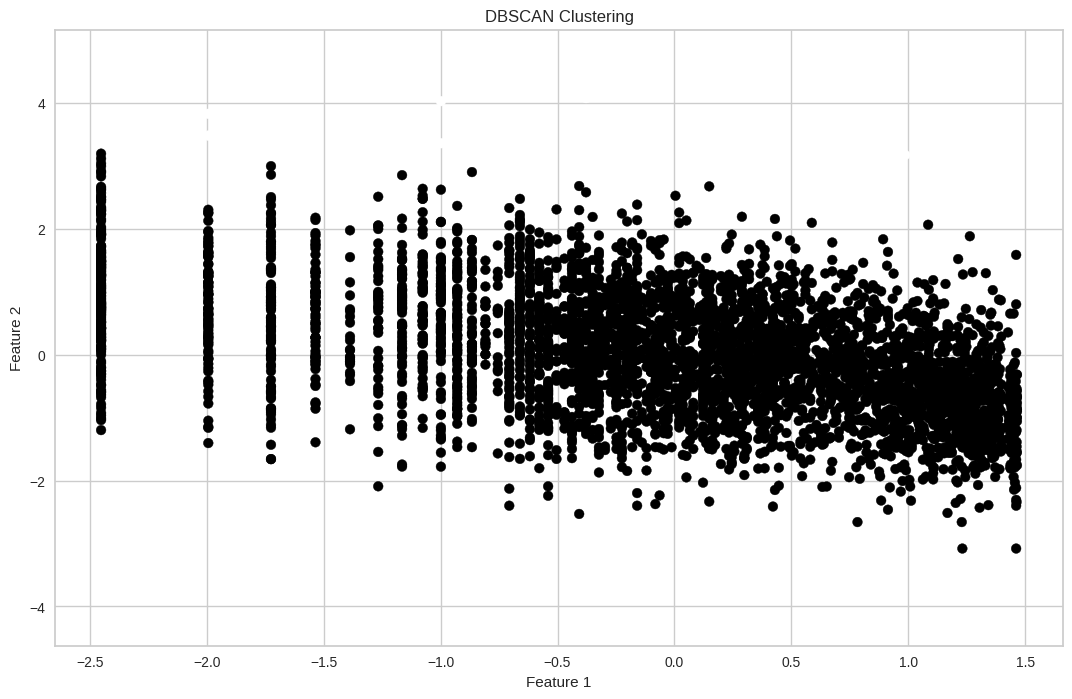

In [120]:
y_pred = dbscan_cluster(X1)

## ***8.*** ***Future Work (Optional)***

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**EDA**

Most of the purchases are from United Kingdom followed by Germany, France, Ireland and Spain.

Most of the customers purchased items on Thursday, Wednesday, Tuesday.

Most of the customers purchased items in the month of November, October, December, and the least number of purchases in April, January, February.

Most of the customers start their purchase from 10:00 A.M till 2:00 P.M & the 12th hour of the day is the peak for purchasing. After 2:00 P.M the purchasing frequency gradually reduces.

**ML Model**


*   with DBSCAN gives the highest number of clusters 3.

* Sales has been increased from 2010 to 2011.

* Removing outliers.
* Choosing the right approach for segmentation.

* Choosing the right ML models and evaluation metrics.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***